In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.simplefilter(action='ignore')

In [2]:
import datetime as dt

In [3]:
#loading data from csv file into a dataframe

complaints = pd.read_csv('complaints.csv')

In [4]:
#Display top 5 records from complaints dataframe
complaints.head(5)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2023-11-10,Credit card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,NaN,NaN,"CITIZENS FINANCIAL GROUP, INC.",RI,02906,Older American,NaN,Web,2023-11-21,In progress,Yes,NaN,7832913
1,2023-10-14,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,NaN,NaN,Experian Information Solutions Inc.,NY,115XX,NaN,NaN,Web,2023-10-14,In progress,Yes,NaN,7696125
2,2023-10-16,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,"XXXX XXXX XXXX XXXX XXXX XXXX, MI XXXX XX/XX/2...",Company has responded to the consumer and the ...,"I.C. System, Inc.",MI,48204,Servicemember,Consent provided,Web,2023-10-16,Closed with explanation,Yes,NaN,7706978
3,2023-10-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,It has been drawn out into the open that you a...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,XXXXX,NaN,Consent provided,Web,2023-10-20,Closed with non-monetary relief,Yes,NaN,7727412
4,2023-11-07,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,TX,77063,NaN,NaN,Web,2023-11-07,In progress,Yes,NaN,7810796


In [5]:
#Display column names
complaints.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [6]:
# Edit column names

#Replaced unwanted characters in column names with the specified characters in mapping_text variable, 
#and lowered text for column names to ensure uniform naming convention among columns.

#Define mapping text
mapping_text = str.maketrans({' ': '_', '-': '_', '?': ''})

# use translate() method to replace characters
complaints.columns = complaints.columns.str.translate(mapping_text).str.lower()

complaints.columns

Index(['date_received', 'product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zip_code', 'tags', 'consumer_consent_provided',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response', 'consumer_disputed', 'complaint_id'],
      dtype='object')

In [7]:
#Check shape of data
complaints.shape

(4375202, 18)

Dataframe has 4375202 rows and 18 columns. <br> <br>
Column names are <br>
        'date_received', 'product', 'sub_product', 'issue', 'sub_issue', 
        'consumer_complaint_narrative', 'company_public_response', 'company', 
        'state', 'zip_code', 'tags', 'consumer_consent_provided', 
        'submitted_via', 'date_sent_to_company', 'company_response_to_consumer', 
        'timely_response', 'consumer_disputed', 'complaint_id'

In [8]:
complaints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4375202 entries, 0 to 4375201
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   date_received                 object
 1   product                       object
 2   sub_product                   object
 3   issue                         object
 4   sub_issue                     object
 5   consumer_complaint_narrative  object
 6   company_public_response       object
 7   company                       object
 8   state                         object
 9   zip_code                      object
 10  tags                          object
 11  consumer_consent_provided     object
 12  submitted_via                 object
 13  date_sent_to_company          object
 14  company_response_to_consumer  object
 15  timely_response               object
 16  consumer_disputed             object
 17  complaint_id                  int64 
dtypes: int64(1), object(17)
memory usage: 600.

In [9]:
#changing date_received and date_sent_to_company column datatypes to date
complaints['date_received'] = pd.to_datetime(complaints['date_received'])
complaints['date_sent_to_company'] = pd.to_datetime(complaints['date_sent_to_company'])

In [10]:
complaints.dtypes

date_received                   datetime64[ns]
product                                 object
sub_product                             object
issue                                   object
sub_issue                               object
consumer_complaint_narrative            object
company_public_response                 object
company                                 object
state                                   object
zip_code                                object
tags                                    object
consumer_consent_provided               object
submitted_via                           object
date_sent_to_company            datetime64[ns]
company_response_to_consumer            object
timely_response                         object
consumer_disputed                       object
complaint_id                             int64
dtype: object

In [11]:
complaints.drop(columns='complaint_id', inplace=True)

In [12]:
complaints.describe(include=['O']).T

,count,unique,top,freq
product,4375202,21,"Credit reporting, credit repair services, or o...",2163891
sub_product,4139911,86,Credit reporting,2439248
issue,4375202,177,Incorrect information on your report,1179774
sub_issue,3652928,272,Information belongs to someone else,779346
consumer_complaint_narrative,1590094,1325965,My name is XXXX XXXX this complaint is not mad...,2764
company_public_response,2062071,11,Company has responded to the consumer and the ...,1827906
company,4375202,7059,"EQUIFAX, INC.",856194
state,4331516,63,FL,513262
zip_code,4344979,33223,XXXXX,106859
tags,443744,3,Servicemember,258091


In [13]:
#checking for presence of null values
complaints.isna().sum()

date_received                         0
product                               0
sub_product                      235291
issue                                 0
sub_issue                        722274
consumer_complaint_narrative    2785108
company_public_response         2313131
company                               0
state                             43686
zip_code                          30223
tags                            3931458
consumer_consent_provided        909365
submitted_via                         0
date_sent_to_company                  0
company_response_to_consumer          9
timely_response                       0
consumer_disputed               3606847
dtype: int64

In [14]:
#Checking for duplicate rows
complaints.duplicated().sum()

170143

The data has null/NaN values present in most of the fields, we need to identify if they are actually missing values or do they indicate a category of responses. The dataset has 170143 duplicate rows.

In [15]:
#drop duplicates
complaints.drop_duplicates(inplace=True)

In [16]:
complaints['consumer_disputed'].fillna('Not Applicable', inplace=True)

Analyse the data to answer a few questions. <br><br>
**Overview of Complaints by year received by CFPB**

In [17]:
print(complaints['date_received'].min())
print(complaints['date_received'].max())

2011-12-01 00:00:00
2023-12-04 00:00:00


In [18]:
complaints['year'] = complaints['date_received'].dt.year

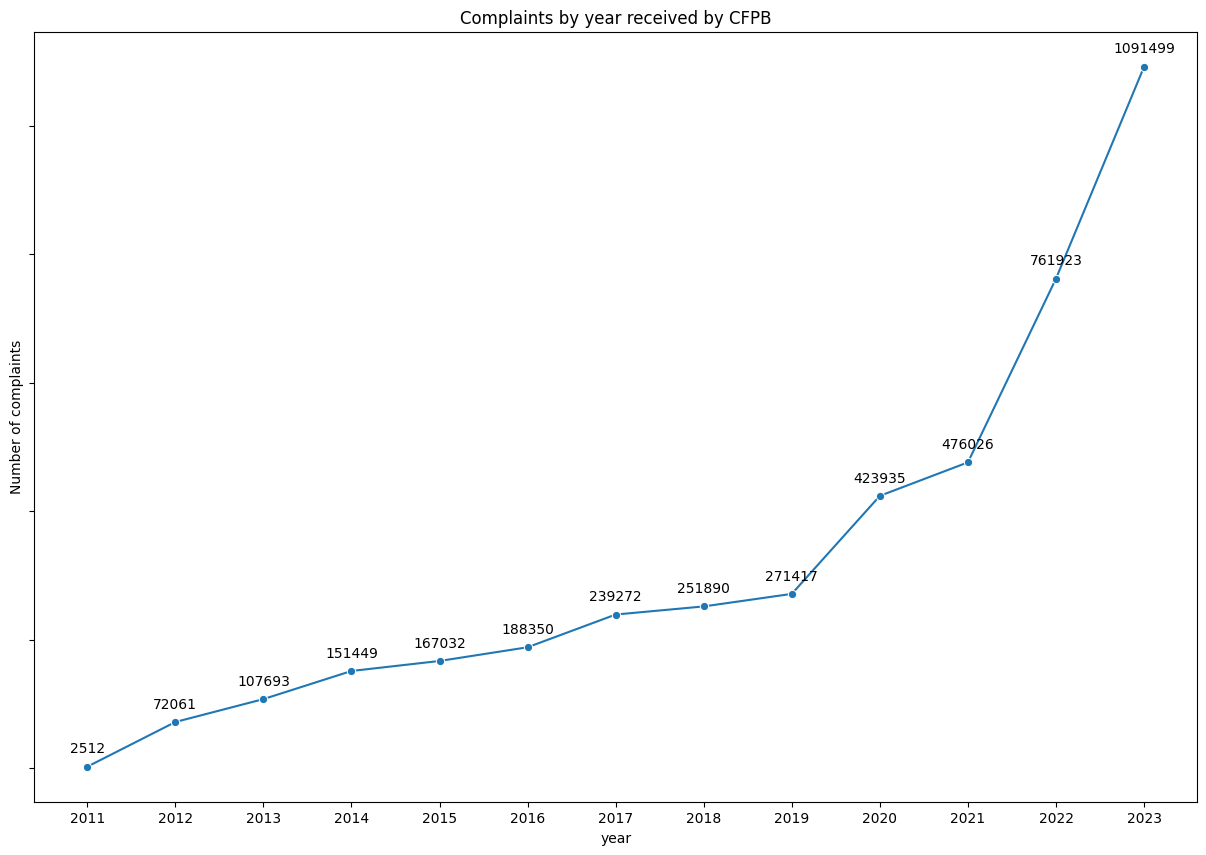

In [19]:
complaints_rcvd_by_year = complaints.groupby(['year']) \
            .size().to_frame(name='count').reset_index()
plt.figure(figsize=(15,10))
sns.lineplot(data=complaints_rcvd_by_year, x='year', y='count', marker='o')
for index, row in complaints_rcvd_by_year.iterrows():
    plt.annotate(f'{row["count"]}', (row['year'], row['count']), textcoords="offset points", xytext=(0,10), ha='center')
plt.title("Complaints by year received by CFPB")
plt.ylabel('Number of complaints')
plt.tick_params(axis='y', labelleft=False)
plt.xticks(complaints_rcvd_by_year['year'])
plt.show()

We can see there is an increase in number of complaints from 
2011 to 2012, 2013 to 2014, 2016 to 2017 and there is an exponential increase in number of complaints from the year 2019.
#If we do year-on-year growth rate on this data, we can see the percentage of increase in number of complaints for each year.


In [20]:
 complaints_rcvd_by_year['yoy_percentage_increase'] = round(complaints_rcvd_by_year['count'].pct_change()*100, 2)

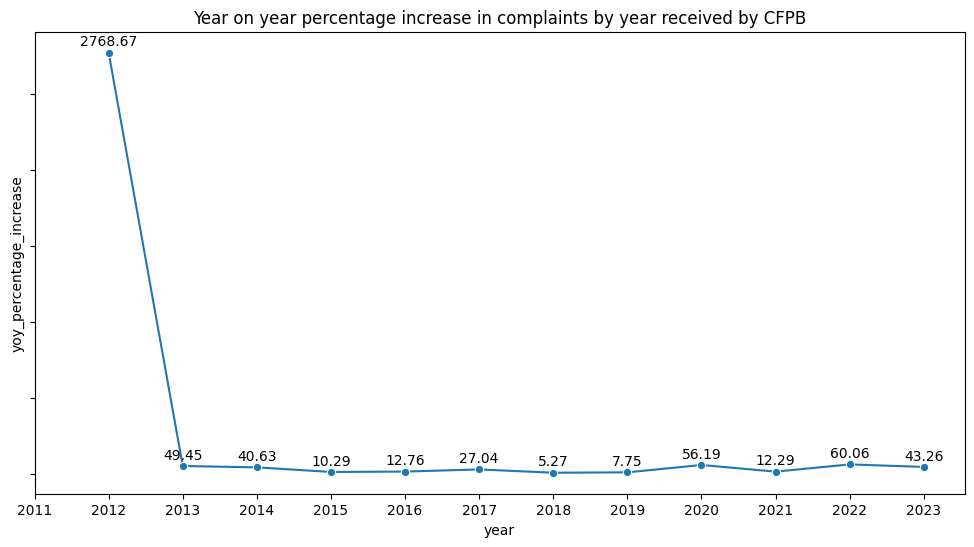

In [21]:
plt.figure(figsize=(12,6))
sns.lineplot(data=complaints_rcvd_by_year, x='year', y='yoy_percentage_increase', marker='o')
for index, row in complaints_rcvd_by_year.iterrows():
    plt.annotate(f'{row["yoy_percentage_increase"]}', (row['year'], row['yoy_percentage_increase']), textcoords="offset points", xytext=(0,5), ha='center')
plt.title("Year on year percentage increase in complaints by year received by CFPB")
#plt.ylabel('Number of complaints')
plt.tick_params(axis='y', labelleft=False)
plt.xticks(complaints_rcvd_by_year['year'])
plt.show()

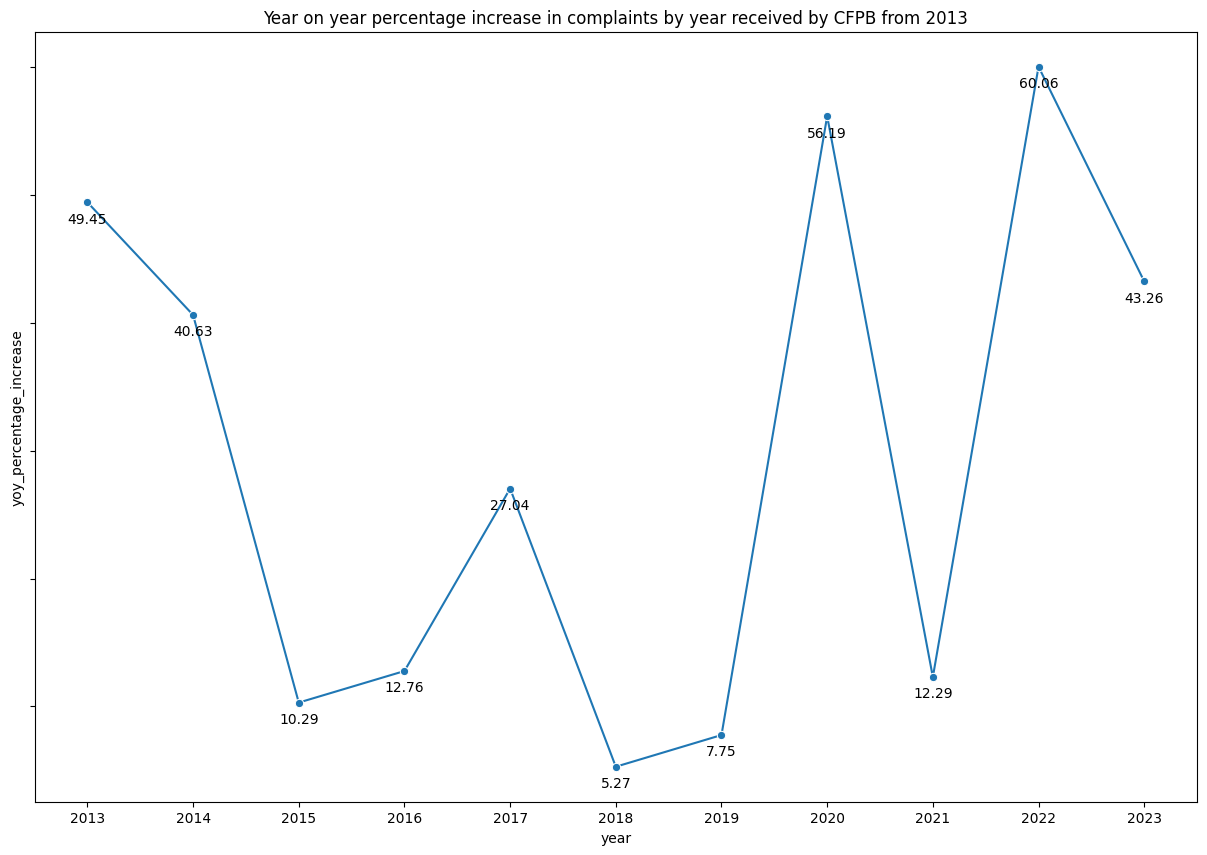

In [22]:
yoy_plot_2013 = complaints_rcvd_by_year.loc[2:,:]
plt.figure(figsize=(15,10))
sns.lineplot(data=yoy_plot_2013, x='year', y='yoy_percentage_increase', marker='o')
for index, row in yoy_plot_2013.iterrows():
    plt.annotate(f'{row["yoy_percentage_increase"]}', (row['year'], row['yoy_percentage_increase']), textcoords="offset points", xytext=(0,-15), ha='center')
plt.title("Year on year percentage increase in complaints by year received by CFPB from 2013")
#plt.ylabel('Number of complaints')
plt.tick_params(axis='y', labelleft=False)
plt.xticks(yoy_plot_2013['year'])
plt.show()

As per the plot above, there is a significant increase in number of complaints during 2017, 2020, 2022. If we investigate further during these time periods we will know what must have caused increase in number of complaints.

**Trend on number of complaints per month**

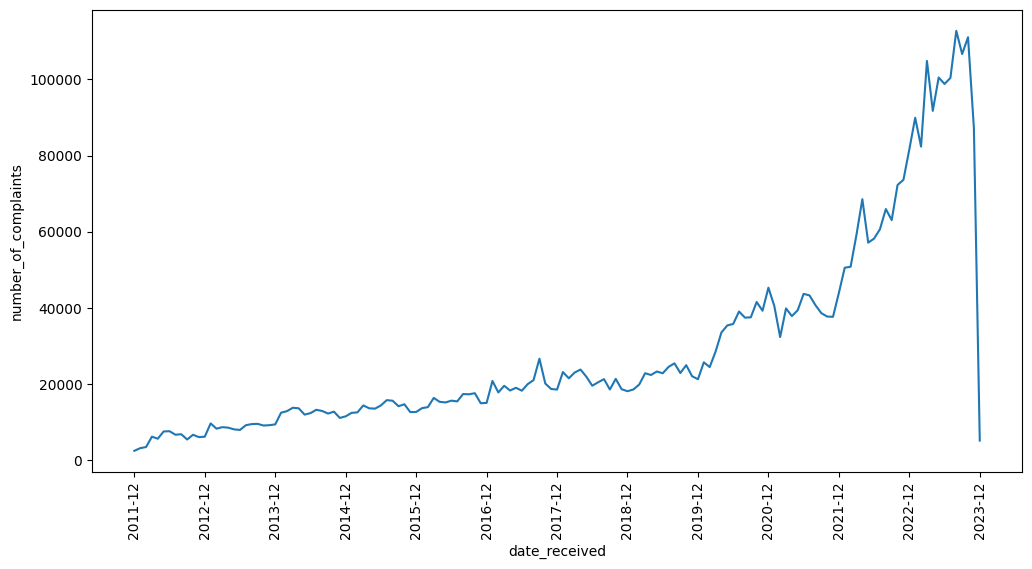

In [23]:
complaints_per_month_year = complaints.groupby([complaints['date_received'].dt.strftime("%Y-%m"),'year'], as_index=False) \
                                            .size().rename(columns={'size':'number_of_complaints'})
plt.figure(figsize=(12,6))
ax = sns.lineplot(complaints_per_month_year, x='date_received', y='number_of_complaints')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xticks(complaints_per_month_year['date_received'][::12])
ax.set_xticklabels(complaints_per_month_year['date_received'][::12], rotation=90)
#plt.grid()
plt.show()

**Top 10 companies by volume of the complaints.**

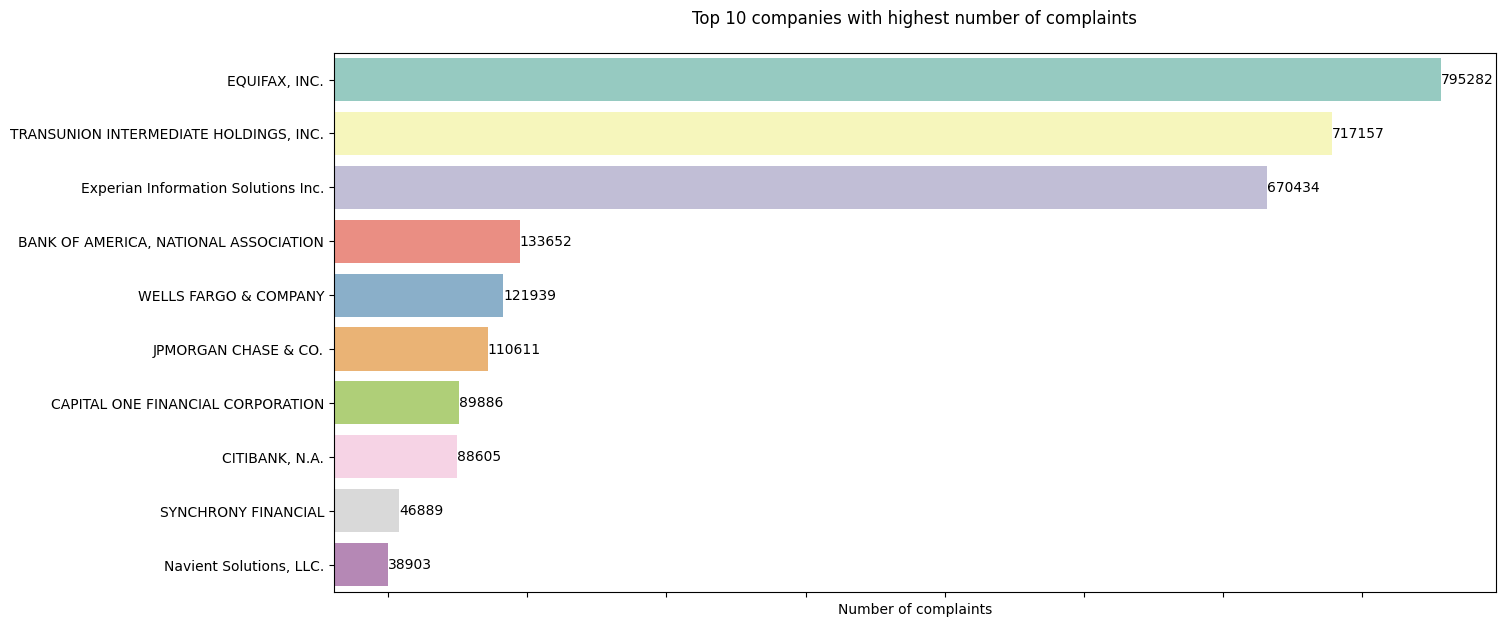

In [24]:
#Top 10 companies with more number of complaints
 
top10_companies = complaints.groupby(['company'], as_index=False).size().sort_values(by='size', ascending=False).head(10)
plt.figure(figsize=(15,7))
sns.barplot(top10_companies, x='size', y = 'company', palette = sns.color_palette("Set3"))
for index, value in enumerate(top10_companies['size']):
    plt.annotate(str(value), xy=(value, index), ha='left', va='center')
minimum = min(100000, top10_companies['size'].min())
maximum = top10_companies['size'].max()
plt.xticks(range(minimum, maximum, 100000 ))
#plt.xticks('')
plt.tick_params(axis='x', labelbottom=False)
plt.xlabel('Number of complaints')
plt.ylabel('')
plt.title("Top 10 companies with highest number of complaints\n")

plt.show()

In [25]:
top10_companies_per = round(((complaints.groupby(['company']).size())/len(complaints)*100),2).to_frame(name='size (%)').reset_index() \
                                                                                .sort_values(by='size (%)', ascending=False) \
                                                                                .head(10)
top10_companies_per['cumulative_sum (%)'] = top10_companies_per['size (%)'].cumsum()
top10_companies_per

,company,size (%),cumulative_sum (%)
2219,"EQUIFAX, INC.",18.91,18.91
6284,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",17.05,35.96
2391,Experian Information Solutions Inc.,15.94,51.90
795,"BANK OF AMERICA, NATIONAL ASSOCIATION",3.18,55.08
6818,WELLS FARGO & COMPANY,2.90,57.98
3461,JPMORGAN CHASE & CO.,2.63,60.61
1110,CAPITAL ONE FINANCIAL CORPORATION,2.14,62.75
1194,"CITIBANK, N.A.",2.11,64.86
5796,SYNCHRONY FINANCIAL,1.12,65.98
4603,"Navient Solutions, LLC.",0.93,66.91


Equifax, Transunion, Experian are the top three U.S. credit bureaus together constitute more than 50% of complaints since inception of CFPB. Nearly 20% of the complaints are related to Equifax INC alone.

**Top ten products and issues by volume of complaints**

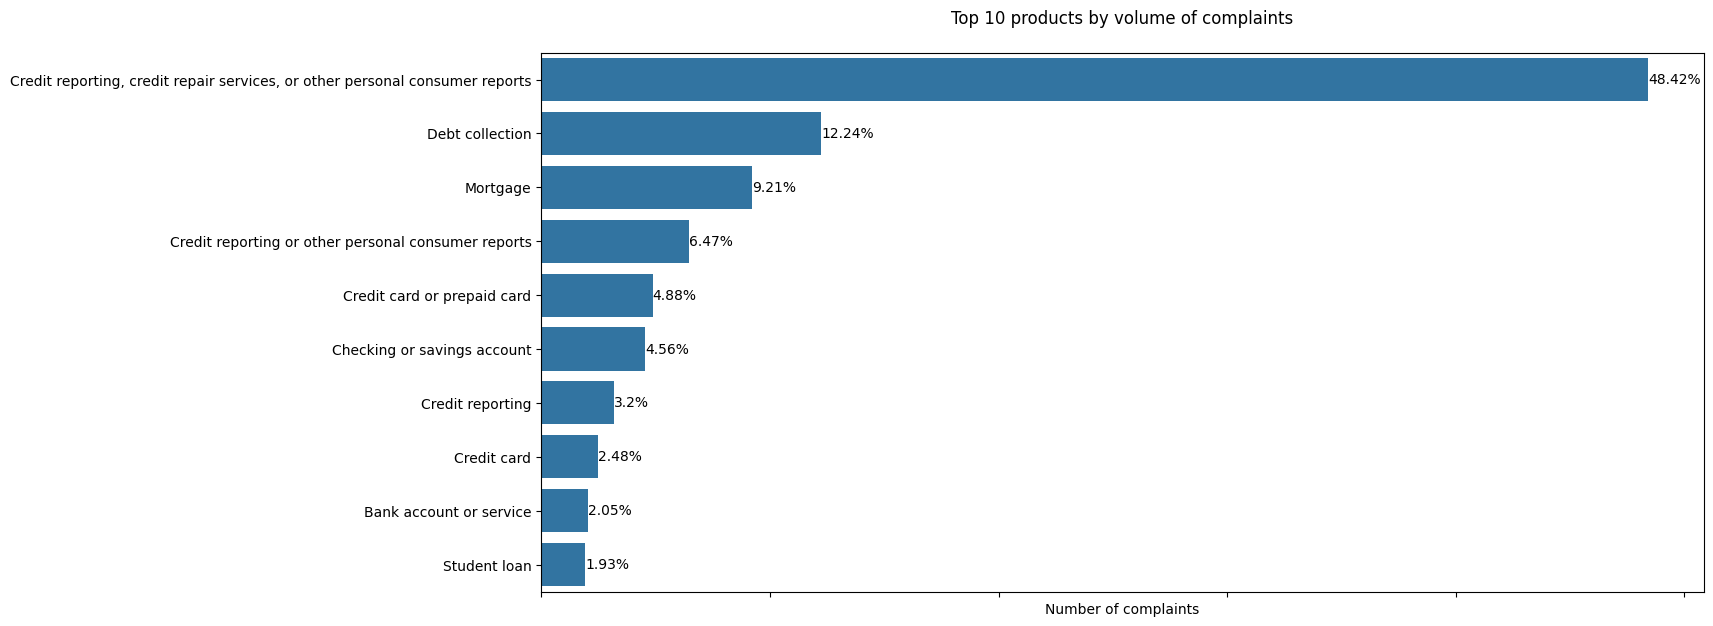

In [26]:
top10_products = round(((complaints.groupby(['product']).size())/len(complaints)*100),2).to_frame(name='size').reset_index() \
                                                                                .sort_values(by='size', ascending=False) \
                                                                                .head(10)
plt.figure(figsize=(15,7))
sns.barplot(top10_products, x='size', y = 'product')
for index, value in enumerate(top10_products['size']):
    plt.annotate(str(value)+"%", xy=(value, index), ha='left', va='center')
#minimum = min(100000, top10_products['size'].min())
#maximum = top10_products['size'].max()
#plt.xticks(range(minimum, maximum, 100000 ))
#plt.xticks('')
plt.tick_params(axis='x', labelbottom=False)
plt.xlabel('Number of complaints')
plt.ylabel('')
plt.title("Top 10 products by volume of complaints\n")

plt.show()

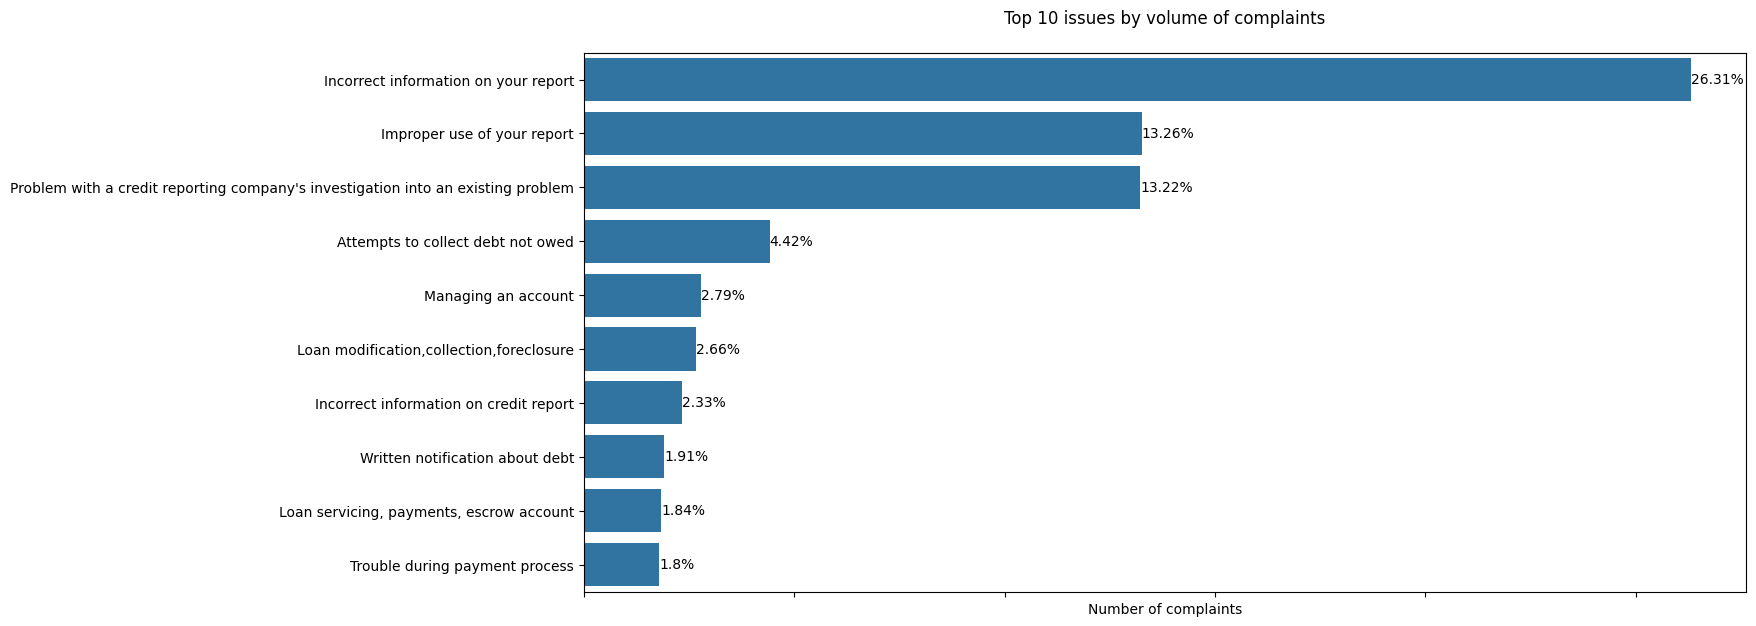

In [27]:
top10_issues = round(((complaints.groupby(['issue']).size())/len(complaints)*100),2).to_frame(name='size').reset_index() \
                                                                                .sort_values(by='size', ascending=False) \
                                                                                .head(10)
plt.figure(figsize=(15,7))
sns.barplot(top10_issues, x='size', y = 'issue')
for index, value in enumerate(top10_issues['size']):
    plt.annotate(str(value)+"%", xy=(value, index), ha='left', va='center')
#minimum = min(100000, top10_products['size'].min())
#maximum = top10_products['size'].max()
#plt.xticks(range(minimum, maximum, 100000 ))
#plt.xticks('')
plt.tick_params(axis='x', labelbottom=False)
plt.xlabel('Number of complaints')
plt.ylabel('')
plt.title("Top 10 issues by volume of complaints\n")

plt.show()

**Distribution of complaints over the past 5 years, for the top 10 companies by highest number of complaints**


In [28]:
past_10_years = pd.DataFrame(np.sort(complaints['year'].unique())[-10:], columns=['year'])
#past_10_years

In [29]:
date_company_size = complaints.groupby(['year', 'company'], as_index=False) \
                                .size() \
                                .rename(columns={'size':'complaints_per_year'})
date_company_size.head()

,year,company,complaints_per_year
0,2011,AMERICAN EXPRESS COMPANY,61
1,2011,AMERISAVE MORTGAGE CORPORATION,1
2,2011,"ARVEST BANK GROUP, INC.",4
3,2011,American Finance House Lariba,1
4,2011,BANCO POPULAR DE PUERTO RICO,11


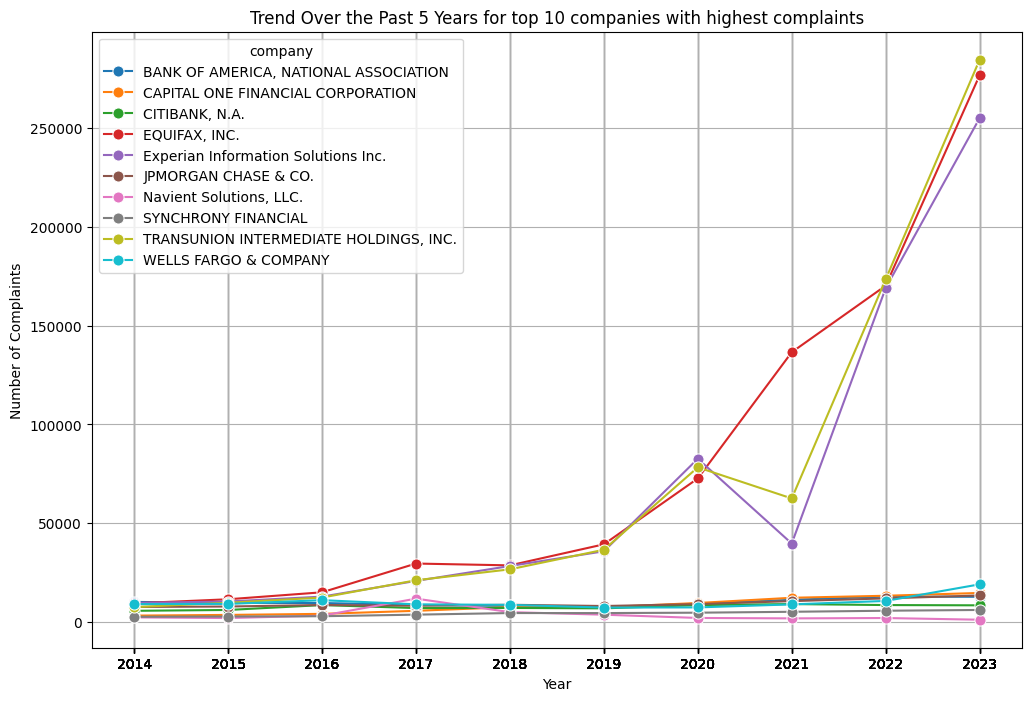

In [30]:
top10_companies_past_10_years = pd.merge(pd.merge(date_company_size, past_10_years, how='inner', on='year'), \
                                        top10_companies, how='inner', on ='company')
plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='complaints_per_year', hue='company', data=top10_companies_past_10_years, marker='o', markersize=8)
plt.title('Trend Over the Past 5 Years for top 10 companies with highest complaints')
plt.xticks(top10_companies_past_10_years['year'])
plt.xlabel('Year')
plt.ylabel('Number of Complaints')
plt.grid(True)
plt.show()

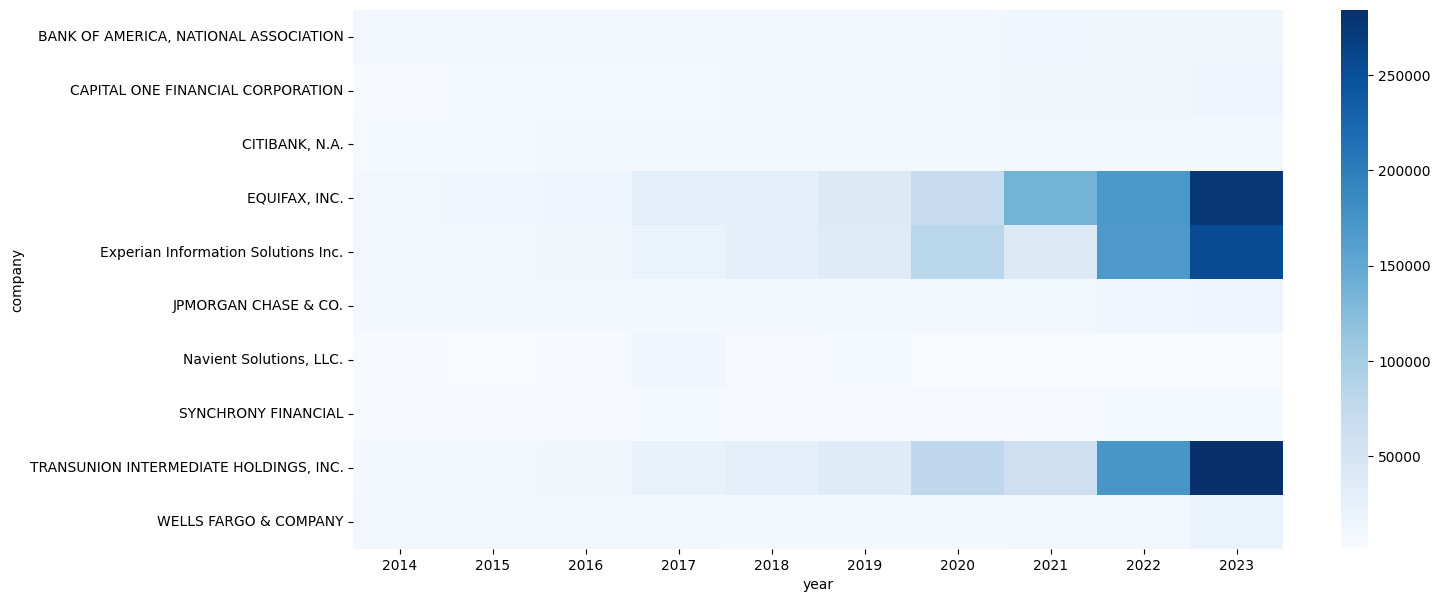

In [31]:
glue = top10_companies_past_10_years.pivot(index='company', columns='year', values='complaints_per_year')
plt.figure(figsize=(15,7))
sns.heatmap(glue, cmap='Blues')
plt.show()

**Distribution of complaints for top 10 companies(by volume of complaints) across top 10 products (by volume of complaints)**

In [32]:
temp_df = pd.merge(complaints, top10_companies, how='inner', on='company')
companies_product_count = pd.merge(temp_df, top10_products, on='product', how='inner')

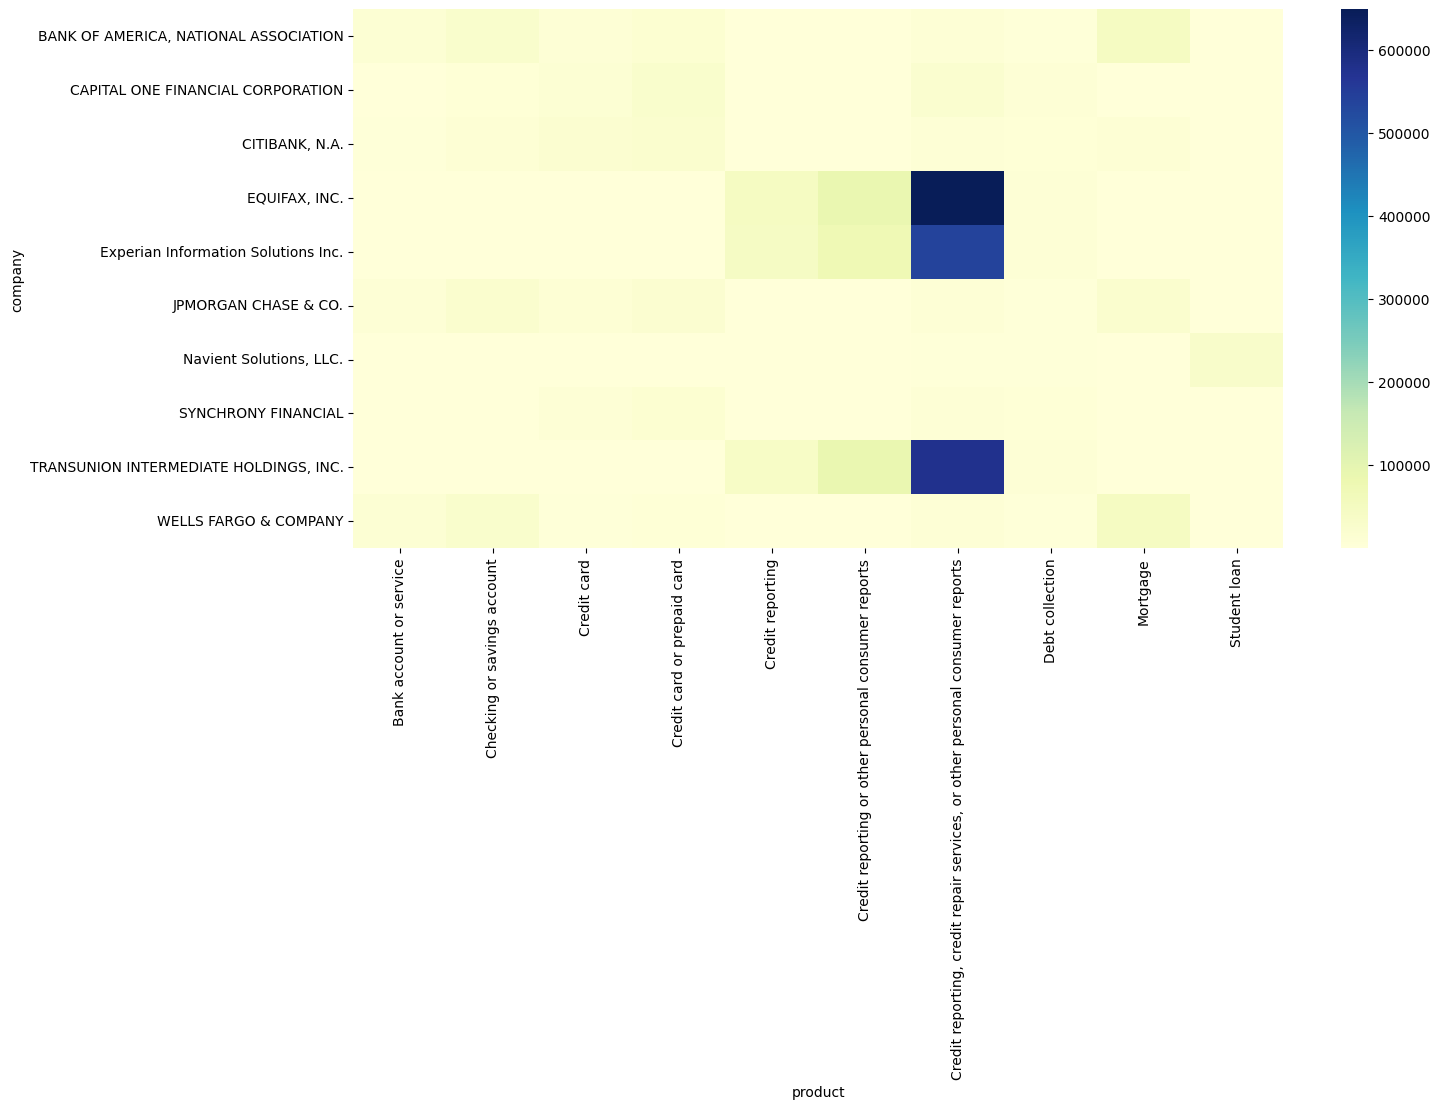

In [33]:
glue = companies_product_count[['company','product']].groupby(['company', 'product'], as_index=False) \
                                                .size() \
                                                .pivot(index='company', columns='product', values='size')
#print(glue.head())
plt.figure(figsize=(15,7))
sns.heatmap(glue, cmap='YlGnBu')
plt.show()

**Detect behaviour of the companies? List the companies which never responded timely.**


In [34]:
#companies with more number of non timely responses
complaints[complaints['timely_response']=='No'].groupby('company', as_index=False) \
                                                .size() \
                                                .sort_values(by='size', ascending=False) \
                                                .head(5)

,company,size
466,"BANK OF AMERICA, NATIONAL ASSOCIATION",3989
3850,WELLS FARGO & COMPANY,3805
1253,"EQUIFAX, INC.",1718
972,Conduent Incorporated,569
2440,"Mobiloans, LLC",568


company no timely response rate can be calculated as no.of complaints with no timely response from the company / total number of complaints against the company

In [35]:
#List of companies which never responded timely to the customers.

year_company_total = complaints.groupby(['company'], as_index=False) \
                                .size() \
                                .rename(columns={'size':'total_complaints'})[['company', 'total_complaints']]
non_timely_response = complaints[complaints['timely_response']=='No'].groupby(['company'], as_index=False) \
                                                                        .size() \
                                .rename(columns={'size':'non_timely_complaints'})[['company', 'non_timely_complaints']]
merged_df = pd.merge(year_company_total, non_timely_response, on =['company'], how='left')
merged_df['non_timely_ration'] = merged_df['non_timely_complaints']/merged_df['total_complaints']
merged_df[(merged_df['non_timely_ration']==1)]['company'].values.tolist()

['(Former)Shapiro, Swertfeger & Hasty, LLP',
 '1 Auto Finance, Inc.',
 '360 Mortgage Inc.',
 '4finance US Holding Company, Inc.',
 'A & O Recovery Solutions, LLC',
 'A Credits Works',
 'A.R.C. Accounts Recovery (U.S.A.) Corporation LLC',
 'AAA LEGACY INVESTMENTS',
 'AARON DELGADO AND ASSOCIATES INC',
 'ABA Recovery Service, Inc.',
 'ACC Management, Inc.',
 'ACE LENDING GROUP, LLC',
 'ACH Recovery Solutions',
 'ACS Financial LLC',
 'AFM Financial Services, LLC',
 'ALG',
 'ALKAN MORTGAGE CORPORATION',
 'ALLIED NATIONAL INC',
 'ALLTRAN FINANCIAL, LP',
 'AMERICONSULTANTS, LLC',
 'AMRON PROFESSIONAL SERVICES',
 'ANSELL GRIMM & AARON, P.C.',
 'AT&T',
 'AUDUBON LIBERTY & ASSOCIATES',
 'AUTOMATED RECOVERY SYSTEMS, INC',
 'Abendroth and Russell, P.C.',
 'Able Mortgage',
 'Absolute investment Group',
 'Access Loan Services Inc.',
 'Account Recovery Service, Inc. (WI)',
 'Accountant Exchange Group',
 'Accounts Recovery Agency Inc.',
 'Accscient, LLC',
 'Activity Collection Service',
 'Advantage F

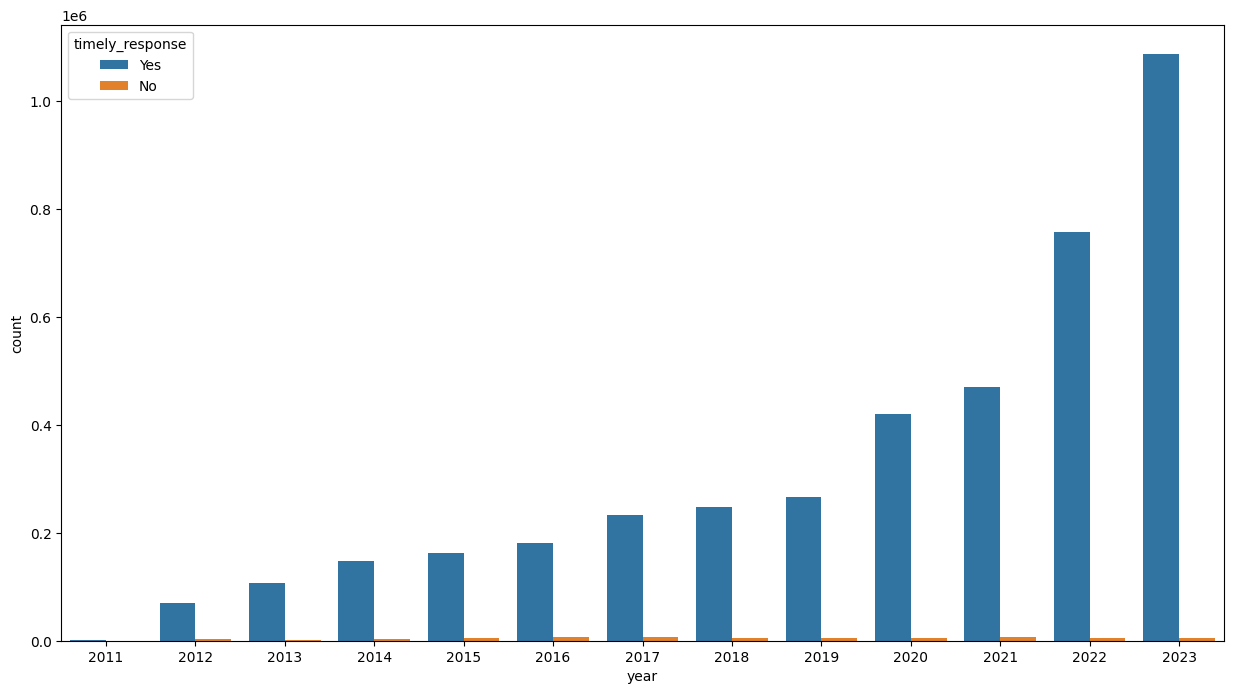

In [36]:
plt.figure(figsize=(15,8))
sns.countplot(complaints, x='year', hue='timely_response')
plt.show()

**Has the customers been receiving a good resolution from companies since the database has been setup?**

This is known by checking whether the customer raised a dispute after receiving a response from the company, If customer raises a dispute it means that customer isn't satisfied with the response. 

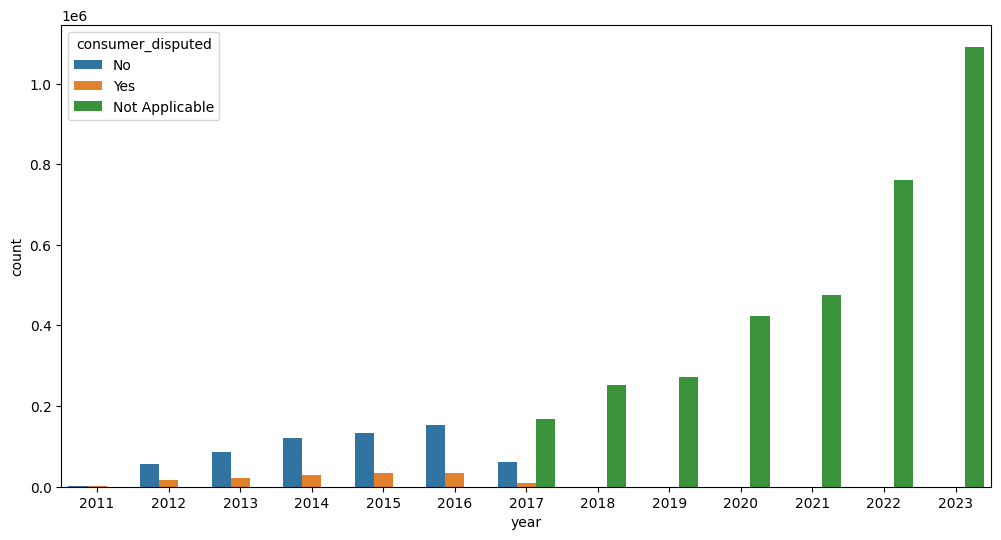

In [37]:
#Complaint resolutions disputed by the consumer
plt.figure(figsize=(12,6))
sns.countplot(complaints, x='year', hue='consumer_disputed')
plt.show()

We can see that the option to dispute is discontinued from the year 2017.

**Share of complaints which have received a resolution in the form of monetary relief from the company**

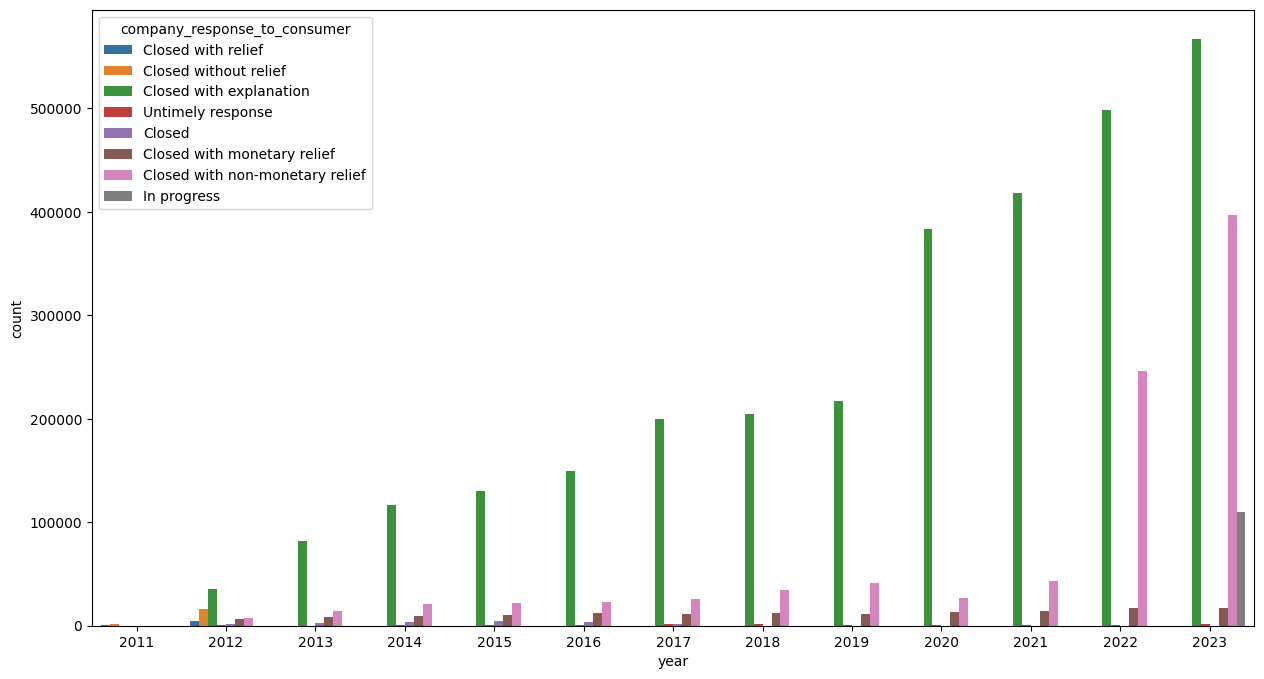

In [38]:
plt.figure(figsize=(15,8))
sns.countplot(complaints, x='year', hue='company_response_to_consumer')
plt.show()

In [39]:
#Total number of complaints closed with monetary relief
closed_with_mon_relief = complaints[complaints['company_response_to_consumer']=='Closed with monetary relief'].shape[0]
closed_with_mon_relief

143143

In [40]:
#Percentage of complaints closed with monetary relief
closed_with_mon_relief/complaints.shape[0]*100

3.4040663876535384

**Of the complaints that were filed, how many were misunderstood by the consumer?**

In [41]:
(complaints['company_public_response'].value_counts(normalize=True)*100).to_frame()

,proportion
company_public_response,
Company has responded to the consumer and the CFPB and chooses not to provide a public response,88.219050
Company believes it acted appropriately as authorized by contract or law,6.650040
Company chooses not to provide a public response,2.621079
Company believes the complaint is the result of a misunderstanding,0.641554
Company disputes the facts presented in the complaint,0.527519
Company believes complaint caused principally by actions of third party outside the control or direction of the company,0.383088
Company believes complaint is the result of an isolated error,0.311861
Company believes complaint represents an opportunity for improvement to better serve consumers,0.236125
Company can't verify or dispute the facts in the complaint,0.216722


company believes that about 0.64% of complaints received are a result of a misunderestanding. Again there's a catch here, this is the outcome when company choose to provide a public response.

**Accessibility - What is the most popular method for consumers to submit complaints to cfpb**

In [42]:
complaints['submitted_via'].value_counts(normalize=True)*100

submitted_via
Web             87.438179
Referral         5.775876
Phone            4.037541
Postal mail      2.108841
Fax              0.600039
Web Referral     0.029417
Email            0.010107
Name: proportion, dtype: float64

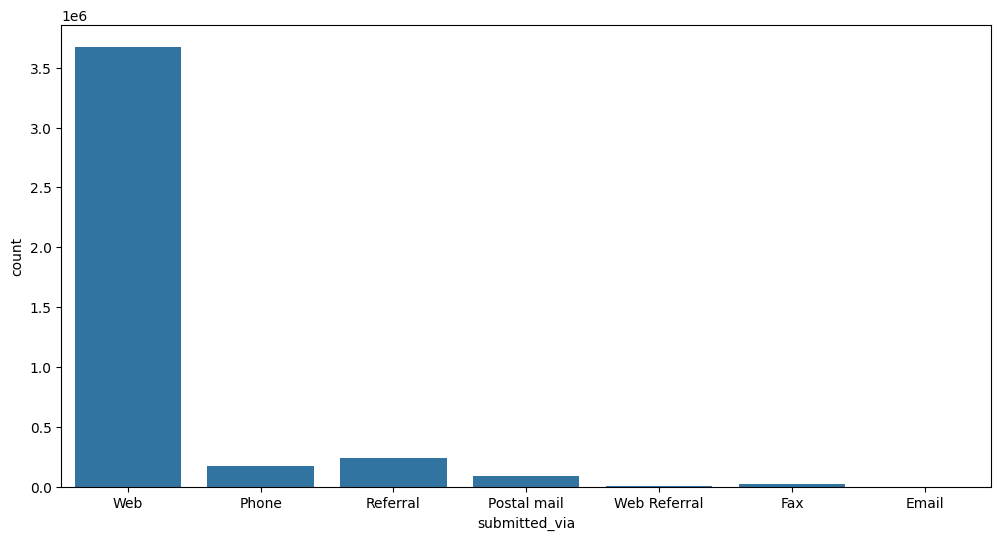

In [43]:
plt.figure(figsize=(12, 6))
sns.countplot(complaints, x='submitted_via')
plt.show()

**How can cfpb use consumer complaint database to identify the problems in financial servises industry by the trend of the complaint database?**

In [44]:
start_date = dt.datetime.strptime('2017-01-01', '%Y-%m-%d')
end_date = dt.datetime.strptime('2017-12-31', '%Y-%m-%d')

In [45]:
complaints.columns

Index(['date_received', 'product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zip_code', 'tags', 'consumer_consent_provided',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response', 'consumer_disputed', 'year'],
      dtype='object')

In [46]:
complaint_trend_2017 = complaints[complaints['year']==2017].groupby(['date_received'], as_index=False) \
                                                                                                .size() \
                                                                                                .rename(columns={'size':'number_of_complaints'})

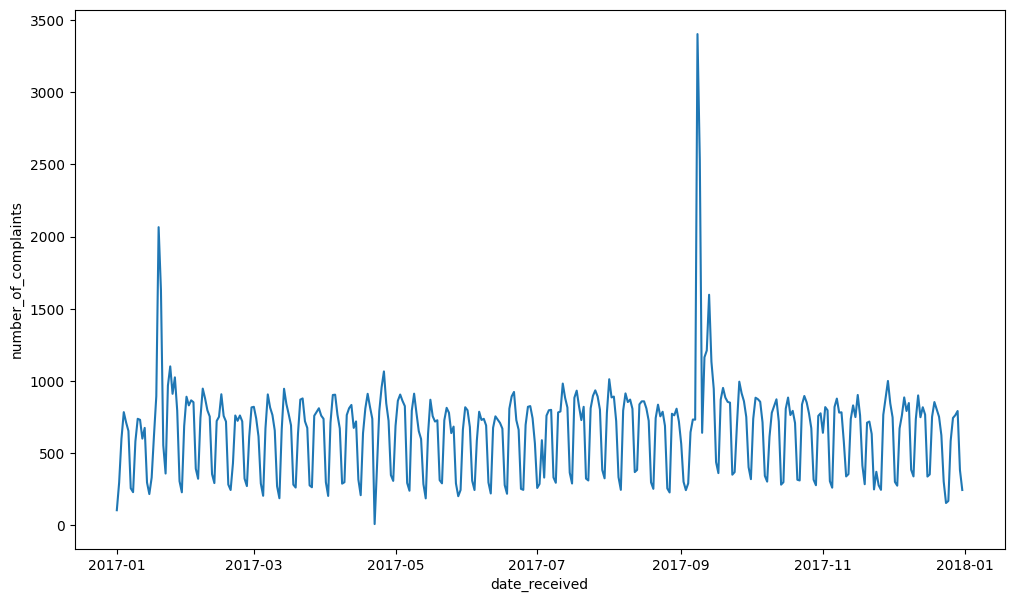

In [47]:
plt.figure(figsize=(12,7))
sns.lineplot(complaint_trend_2017, x='date_received', y='number_of_complaints')
plt.show()

Looking at the trend, we can see that there is a significant increase in number of complaints during 09-2017.

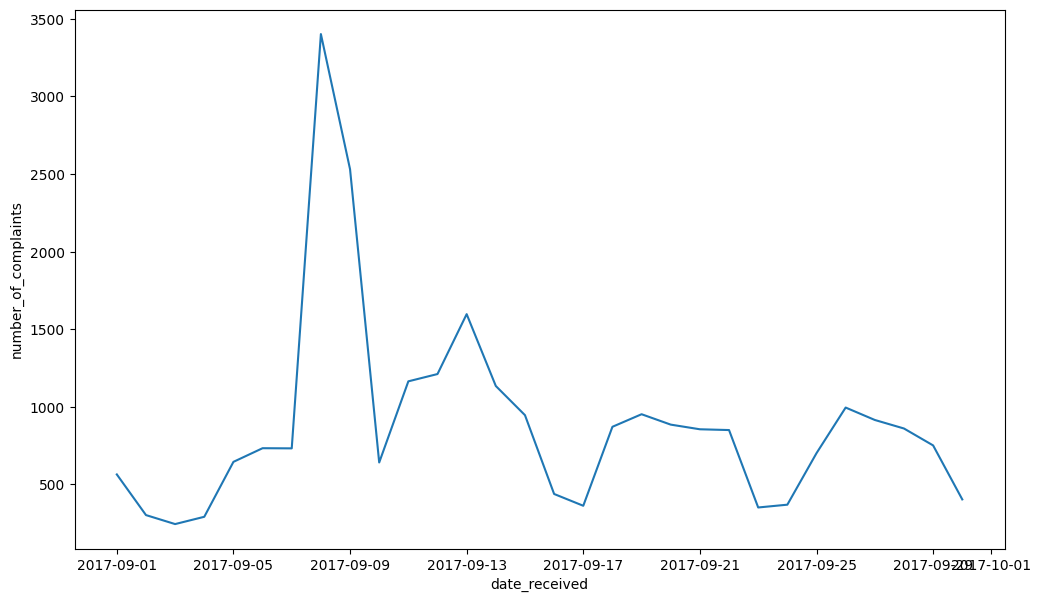

In [48]:
start_date = dt.datetime.strptime('2017-09-01', '%Y-%m-%d')
end_date = dt.datetime.strptime('2017-09-30', '%Y-%m-%d')
filtered_df = complaints[(complaints['date_received']>=start_date) & (complaints['date_received']<=end_date)]
complaint_trend_2017 = filtered_df.groupby(['date_received'], as_index=False) \
                                                                                                .size() \
                                                                                                .rename(columns={'size':'number_of_complaints'})#[['date_received, number_of_complaints']]
plt.figure(figsize=(12,7))
sns.lineplot(complaint_trend_2017, x='date_received', y='number_of_complaints')
plt.show()

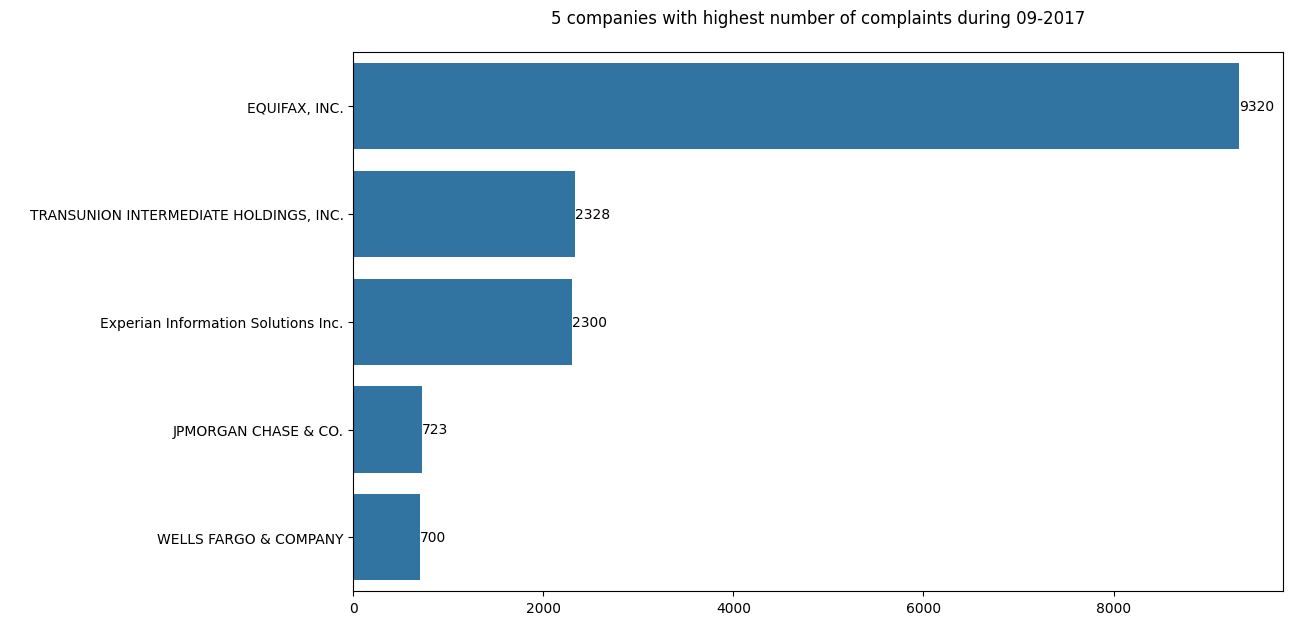

In [49]:

complaint_trend_09_2017 = filtered_df.groupby(['company'], as_index=False) \
                                     .size() \
                                     .sort_values(by='size', ascending=False) \
                                     .head(5)
plt.figure(figsize=(12,7))
sns.barplot(complaint_trend_09_2017, y='company', x='size')
for index, value in enumerate(complaint_trend_09_2017['size']):
    plt.annotate(str(value), xy=(value, index), ha='left', va='center')
plt.title("5 companies with highest number of complaints during 09-2017\n")
plt.ylabel(' ')
plt.xlabel('')
plt.show()

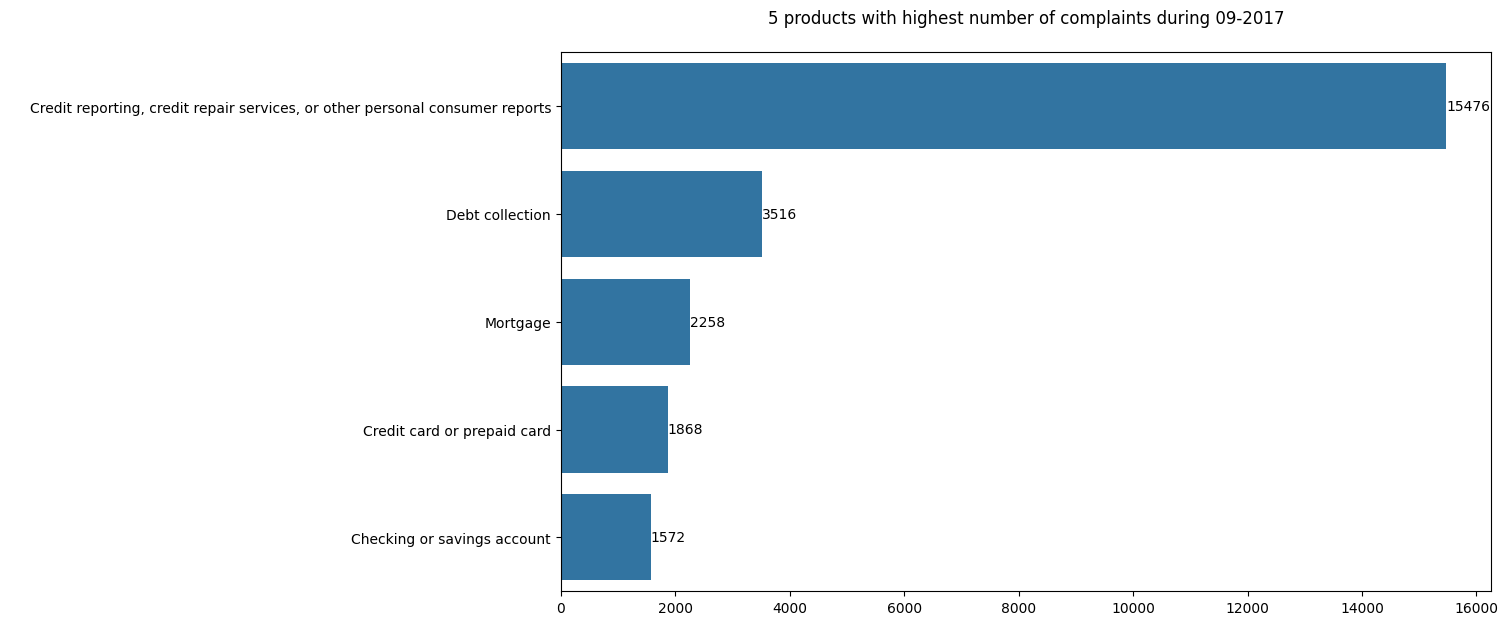

In [50]:

complaint_trend_09_2017 = filtered_df.groupby(['product'], as_index=False) \
                                     .size() \
                                     .sort_values(by='size', ascending=False) \
                                     .head(5)
plt.figure(figsize=(12,7))
sns.barplot(complaint_trend_09_2017, y='product', x='size')
for index, value in enumerate(complaint_trend_09_2017['size']):
    plt.annotate(str(value), xy=(value, index), ha='left', va='center')
plt.title("5 products with highest number of complaints during 09-2017\n")
plt.ylabel(' ')
plt.xlabel('')
plt.show()

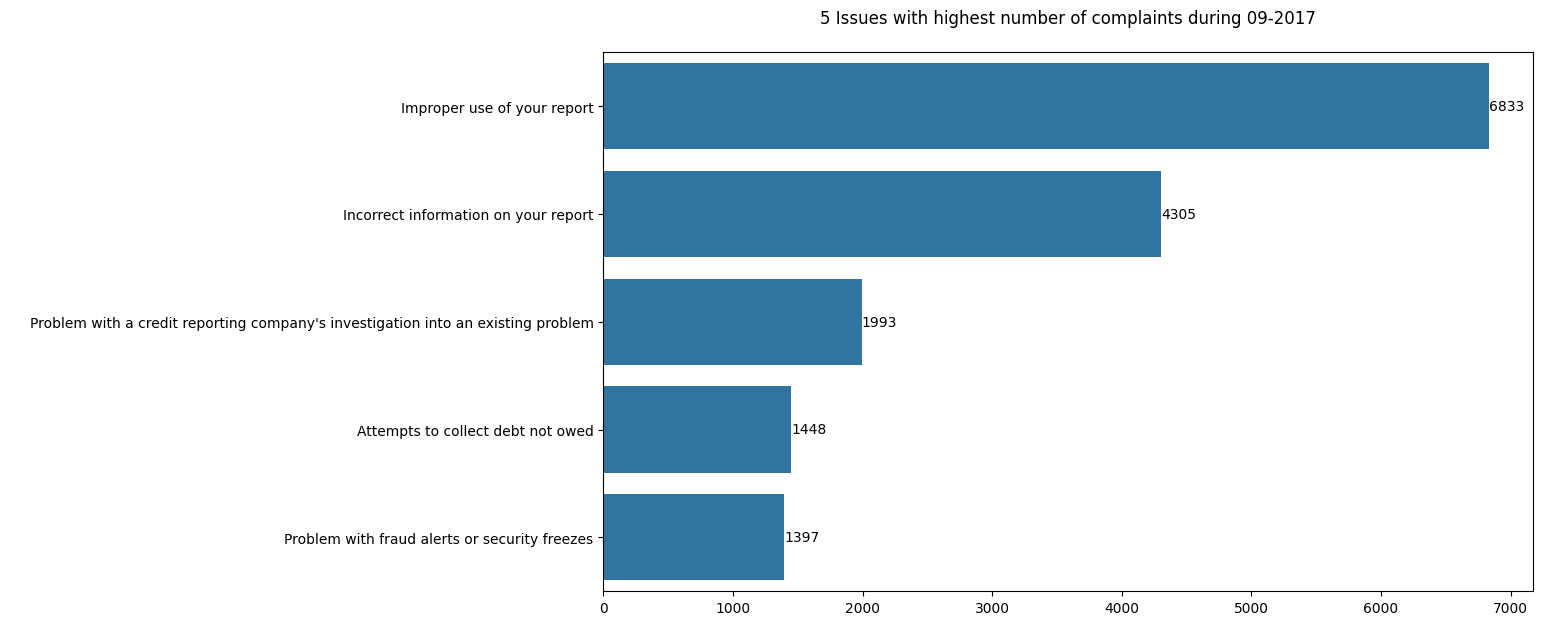

In [51]:

complaint_trend_09_2017 = filtered_df.groupby(['issue'], as_index=False) \
                                     .size() \
                                     .sort_values(by='size', ascending=False) \
                                     .head(5)
plt.figure(figsize=(12,7))
sns.barplot(complaint_trend_09_2017, y='issue', x='size')
for index, value in enumerate(complaint_trend_09_2017['size']):
    plt.annotate(str(value), xy=(value, index), ha='left', va='center')
plt.title("5 Issues with highest number of complaints during 09-2017\n")
plt.ylabel(' ')
plt.xlabel('')
plt.show()

In [52]:
#Top 5 issues listed with Equifax Inc databreach in September 2017
filtered_df[filtered_df['company']=='EQUIFAX, INC.']['issue'].value_counts().nlargest(5)

issue
Improper use of your report                                                         5776
Incorrect information on your report                                                1223
Problem with a credit reporting company's investigation into an existing problem     780
Problem with fraud alerts or security freezes                                        748
Credit monitoring or identity theft protection services                              473
Name: count, dtype: int64

In [53]:
#Top 10 states impacted by Equifax Inc data breach incident?
filtered_df[filtered_df['company']=='EQUIFAX, INC.']['state'].value_counts().nlargest(10)

state
CA    1666
TX     738
NY     553
IL     425
GA     389
FL     380
WA     368
PA     317
NC     301
VA     280
Name: count, dtype: int64

**Number of companies named by consumers each year**

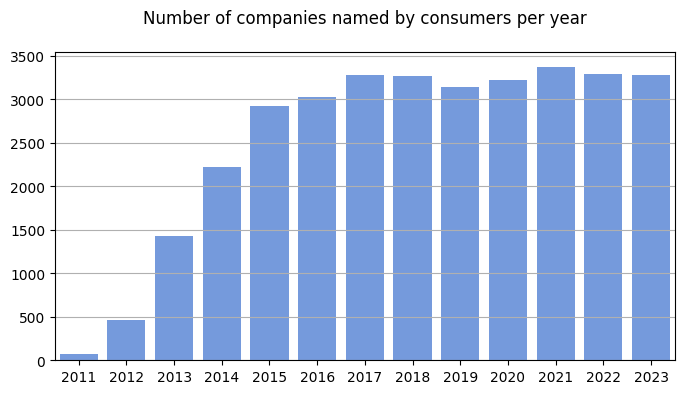

In [54]:
year_num_of_companies = complaints.groupby(['year','company'], as_index=False).size()
plt.figure(figsize=(8,4))
sns.color_palette("light:#5A9", as_cmap=True)
sns.countplot(year_num_of_companies, x='year', color='cornflowerblue')
plt.title("Number of companies named by consumers per year\n")
plt.ylabel('')
plt.xlabel('')
plt.grid(axis='y')
plt.show()

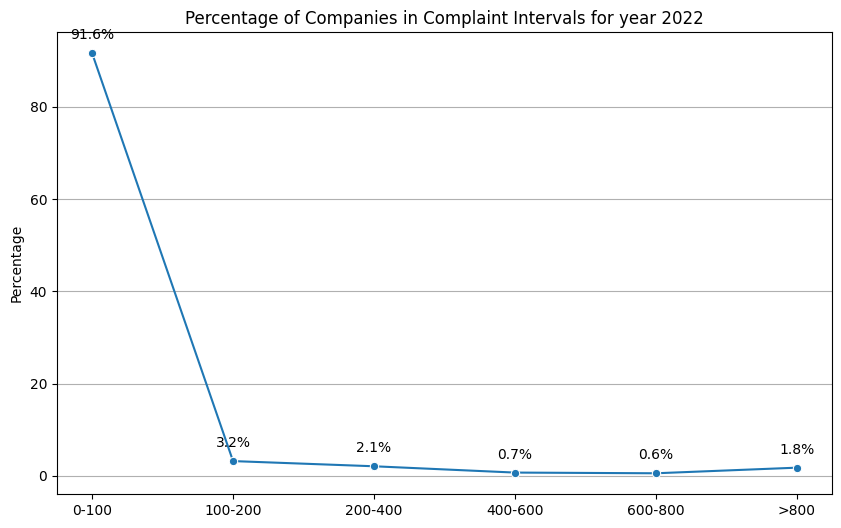

In [55]:
#percentage of companies with more than given number of complaints in 2022
complaints_2022 = complaints[complaints['year']==2022].groupby('company', as_index=False).size().rename(columns={'size':'complaints'})
intervals=[(0,100),(100,200),(200,400),(400,600),(600,800),(800, np.inf)]
percentages = list()
for interval in intervals:
    lower, upper = interval
    filtered_df = complaints_2022[(complaints_2022['complaints'] > lower) & (complaints_2022['complaints'] <= upper)]
    percentage = (len(filtered_df) / len(complaints_2022)) * 100
    percentages.append(percentage)
labels = [f'{lower}-{upper}' if upper != float('inf') else f'>{lower}' for lower, upper in intervals]
plt.figure(figsize=(10, 6))
sns.lineplot(x=labels, y=percentages, marker='o')
for x, y in zip(labels, percentages):
    plt.annotate(f'{y:.1f}%', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')
plt.title('Percentage of Companies in Complaint Intervals for year 2022')
plt.ylabel('Percentage')
plt.grid(axis='y')
plt.show()

Investigated to find number of companies with more than 800, 600 to 800, 400 to 600, 200 to 400, 100 to 200, 0 to 100 complaints during year 2022.

In [56]:
complaints_2022[(complaints_2022['complaints'] > 400) & (complaints_2022['complaints'] <= 600)].shape[0]/len(complaints_2022)*100

0.7285974499089253

**Big 3 Credit Bureaus Vs Others**

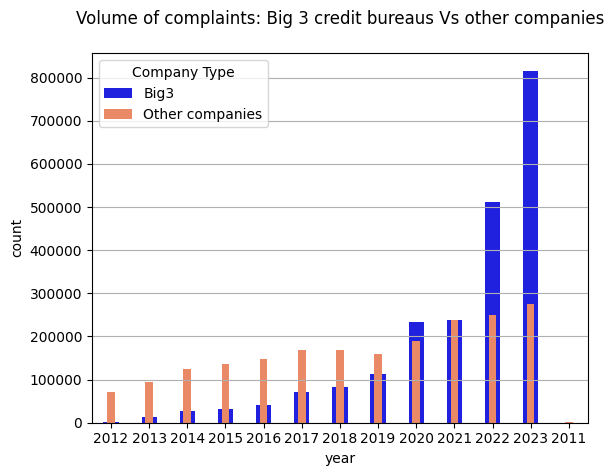

In [64]:
#Complaints volume: Big 3 bureaus vs others
big3 = ['TRANSUNION INTERMEDIATE HOLDINGS, INC.', 'EQUIFAX, INC.', 'Experian Information Solutions Inc.']
big3_company_year = complaints[complaints['company'].isin(big3)]
other_companies_year = complaints[~complaints['company'].isin(big3)]

sns.countplot(big3_company_year, x='year', color='blue', width=0.4, label='Big3')

sns.countplot(other_companies_year, x='year', color='coral', width=0.2, label='Other companies')
plt.grid(axis='y')
plt.title('Volume of complaints: Big 3 credit bureaus Vs other companies\n')
plt.legend(title='Company Type')
plt.show()

**Major issues with BIG3**

In [58]:
#issues with big3
big3_company_year['issue'].value_counts().nlargest(10)

issue
Incorrect information on your report                                                942702
Problem with a credit reporting company's investigation into an existing problem    490715
Improper use of your report                                                         480183
Incorrect information on credit report                                               92576
Problem with a company's investigation into an existing problem                      60713
Unable to get your credit report or credit score                                     24855
Attempts to collect debt not owed                                                    19631
Credit reporting company's investigation                                             16070
Problem with fraud alerts or security freezes                                        13472
Unable to get credit report/credit score                                             10479
Name: count, dtype: int64

**Top product complaints in companies other than BIG3**

In [59]:
#top products in companies other than big3
other_companies_year['product'].value_counts().nlargest(10)

product
Debt collection                                                                 488718
Mortgage                                                                        386818
Credit reporting, credit repair services, or other personal consumer reports    270038
Credit card or prepaid card                                                     199478
Checking or savings account                                                     191447
Credit card                                                                     100191
Bank account or service                                                          86012
Student loan                                                                     80722
Money transfer, virtual currency, or money service                               60322
Vehicle loan or lease                                                            49389
Name: count, dtype: int64

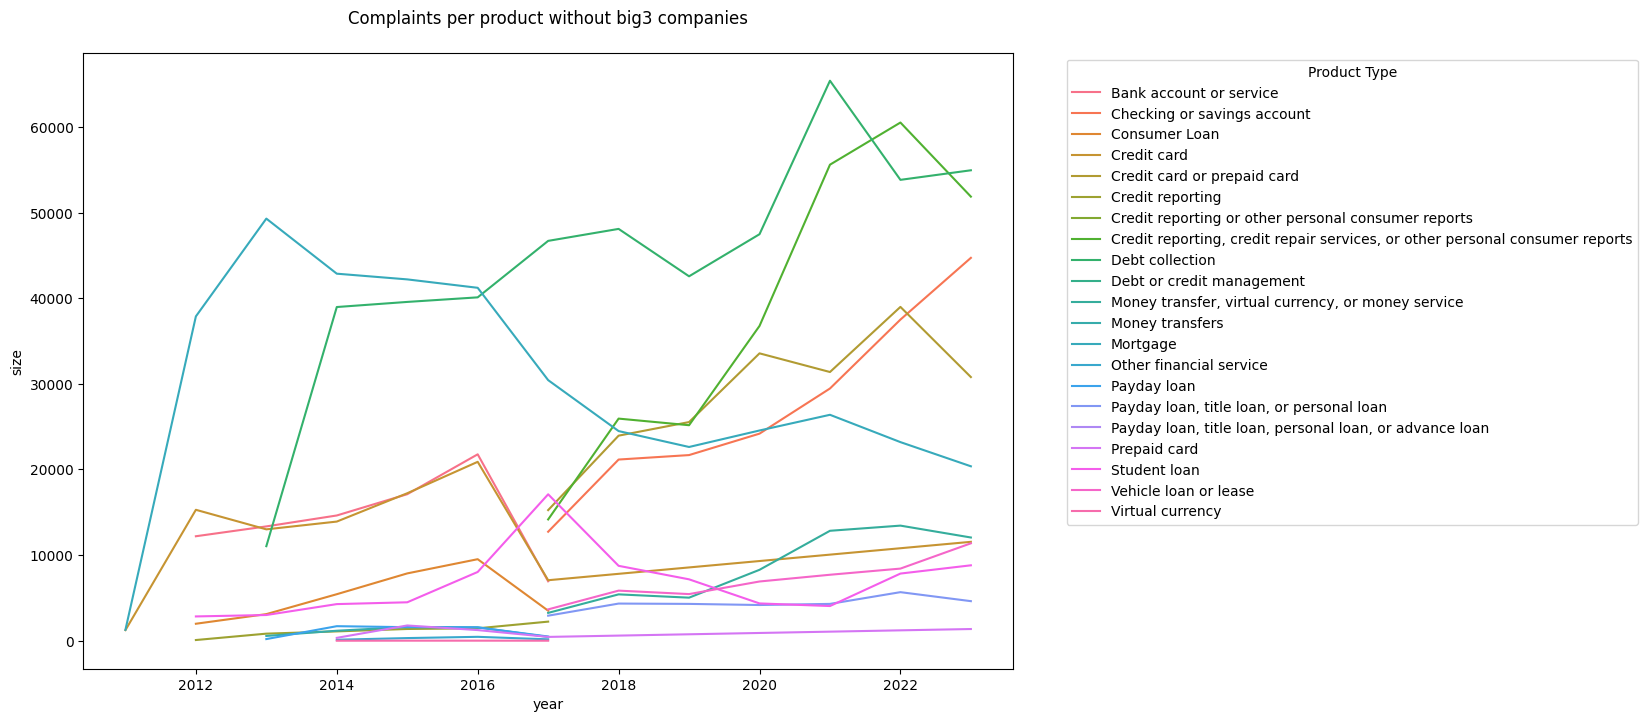

In [60]:
grouped_df = other_companies_year.groupby(['product', 'year'], as_index=False).size()
plt.figure(figsize=(12,8))
sns.lineplot(grouped_df, x='year', y ='size', hue='product')
plt.legend(title='Product Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Complaints per product without big3 companies\n')
plt.show()

**Most Common issues in year 2023** (until 04-12-2023 as per available data)

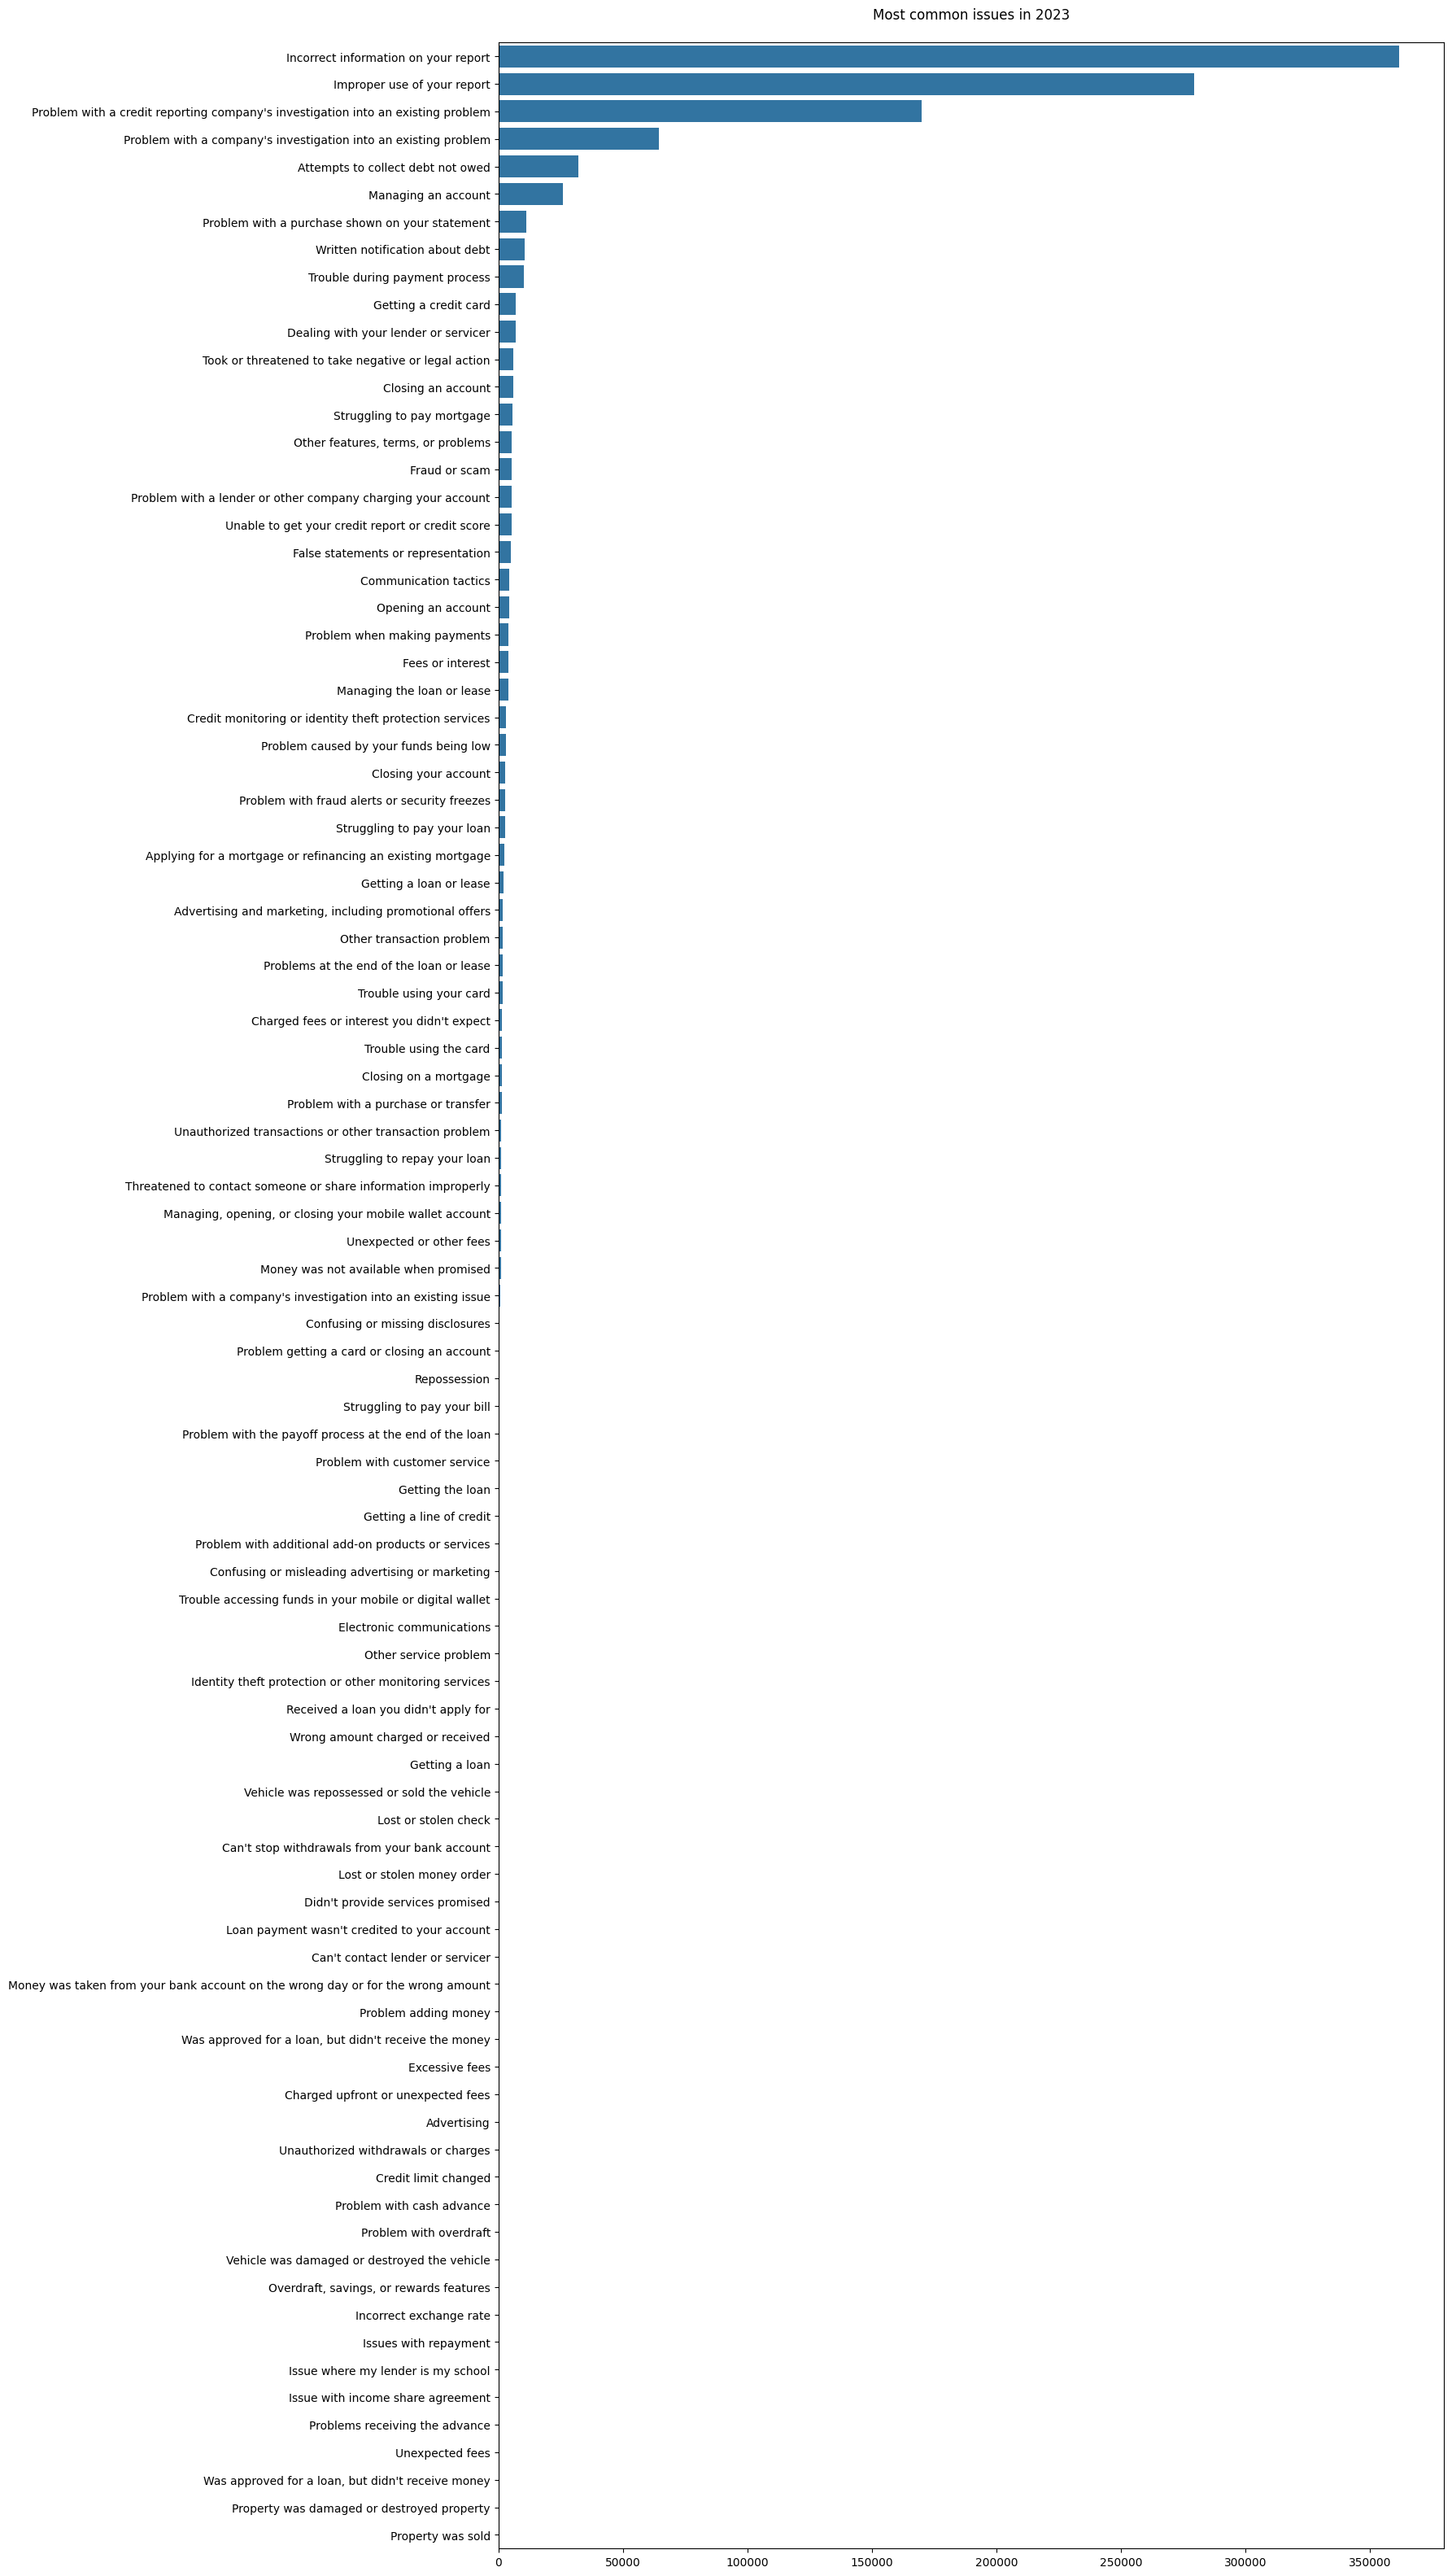

In [61]:
#2023 most common complaint issues
complaints_2023 = complaints[complaints['year']==2023]
plt.figure(figsize=(15,40))
sns.countplot(complaints_2023, y='issue', order = complaints_2023['issue'].value_counts().index)
plt.title("Most common issues in 2023\n")
plt.xlabel('')
plt.ylabel('')
plt.show()

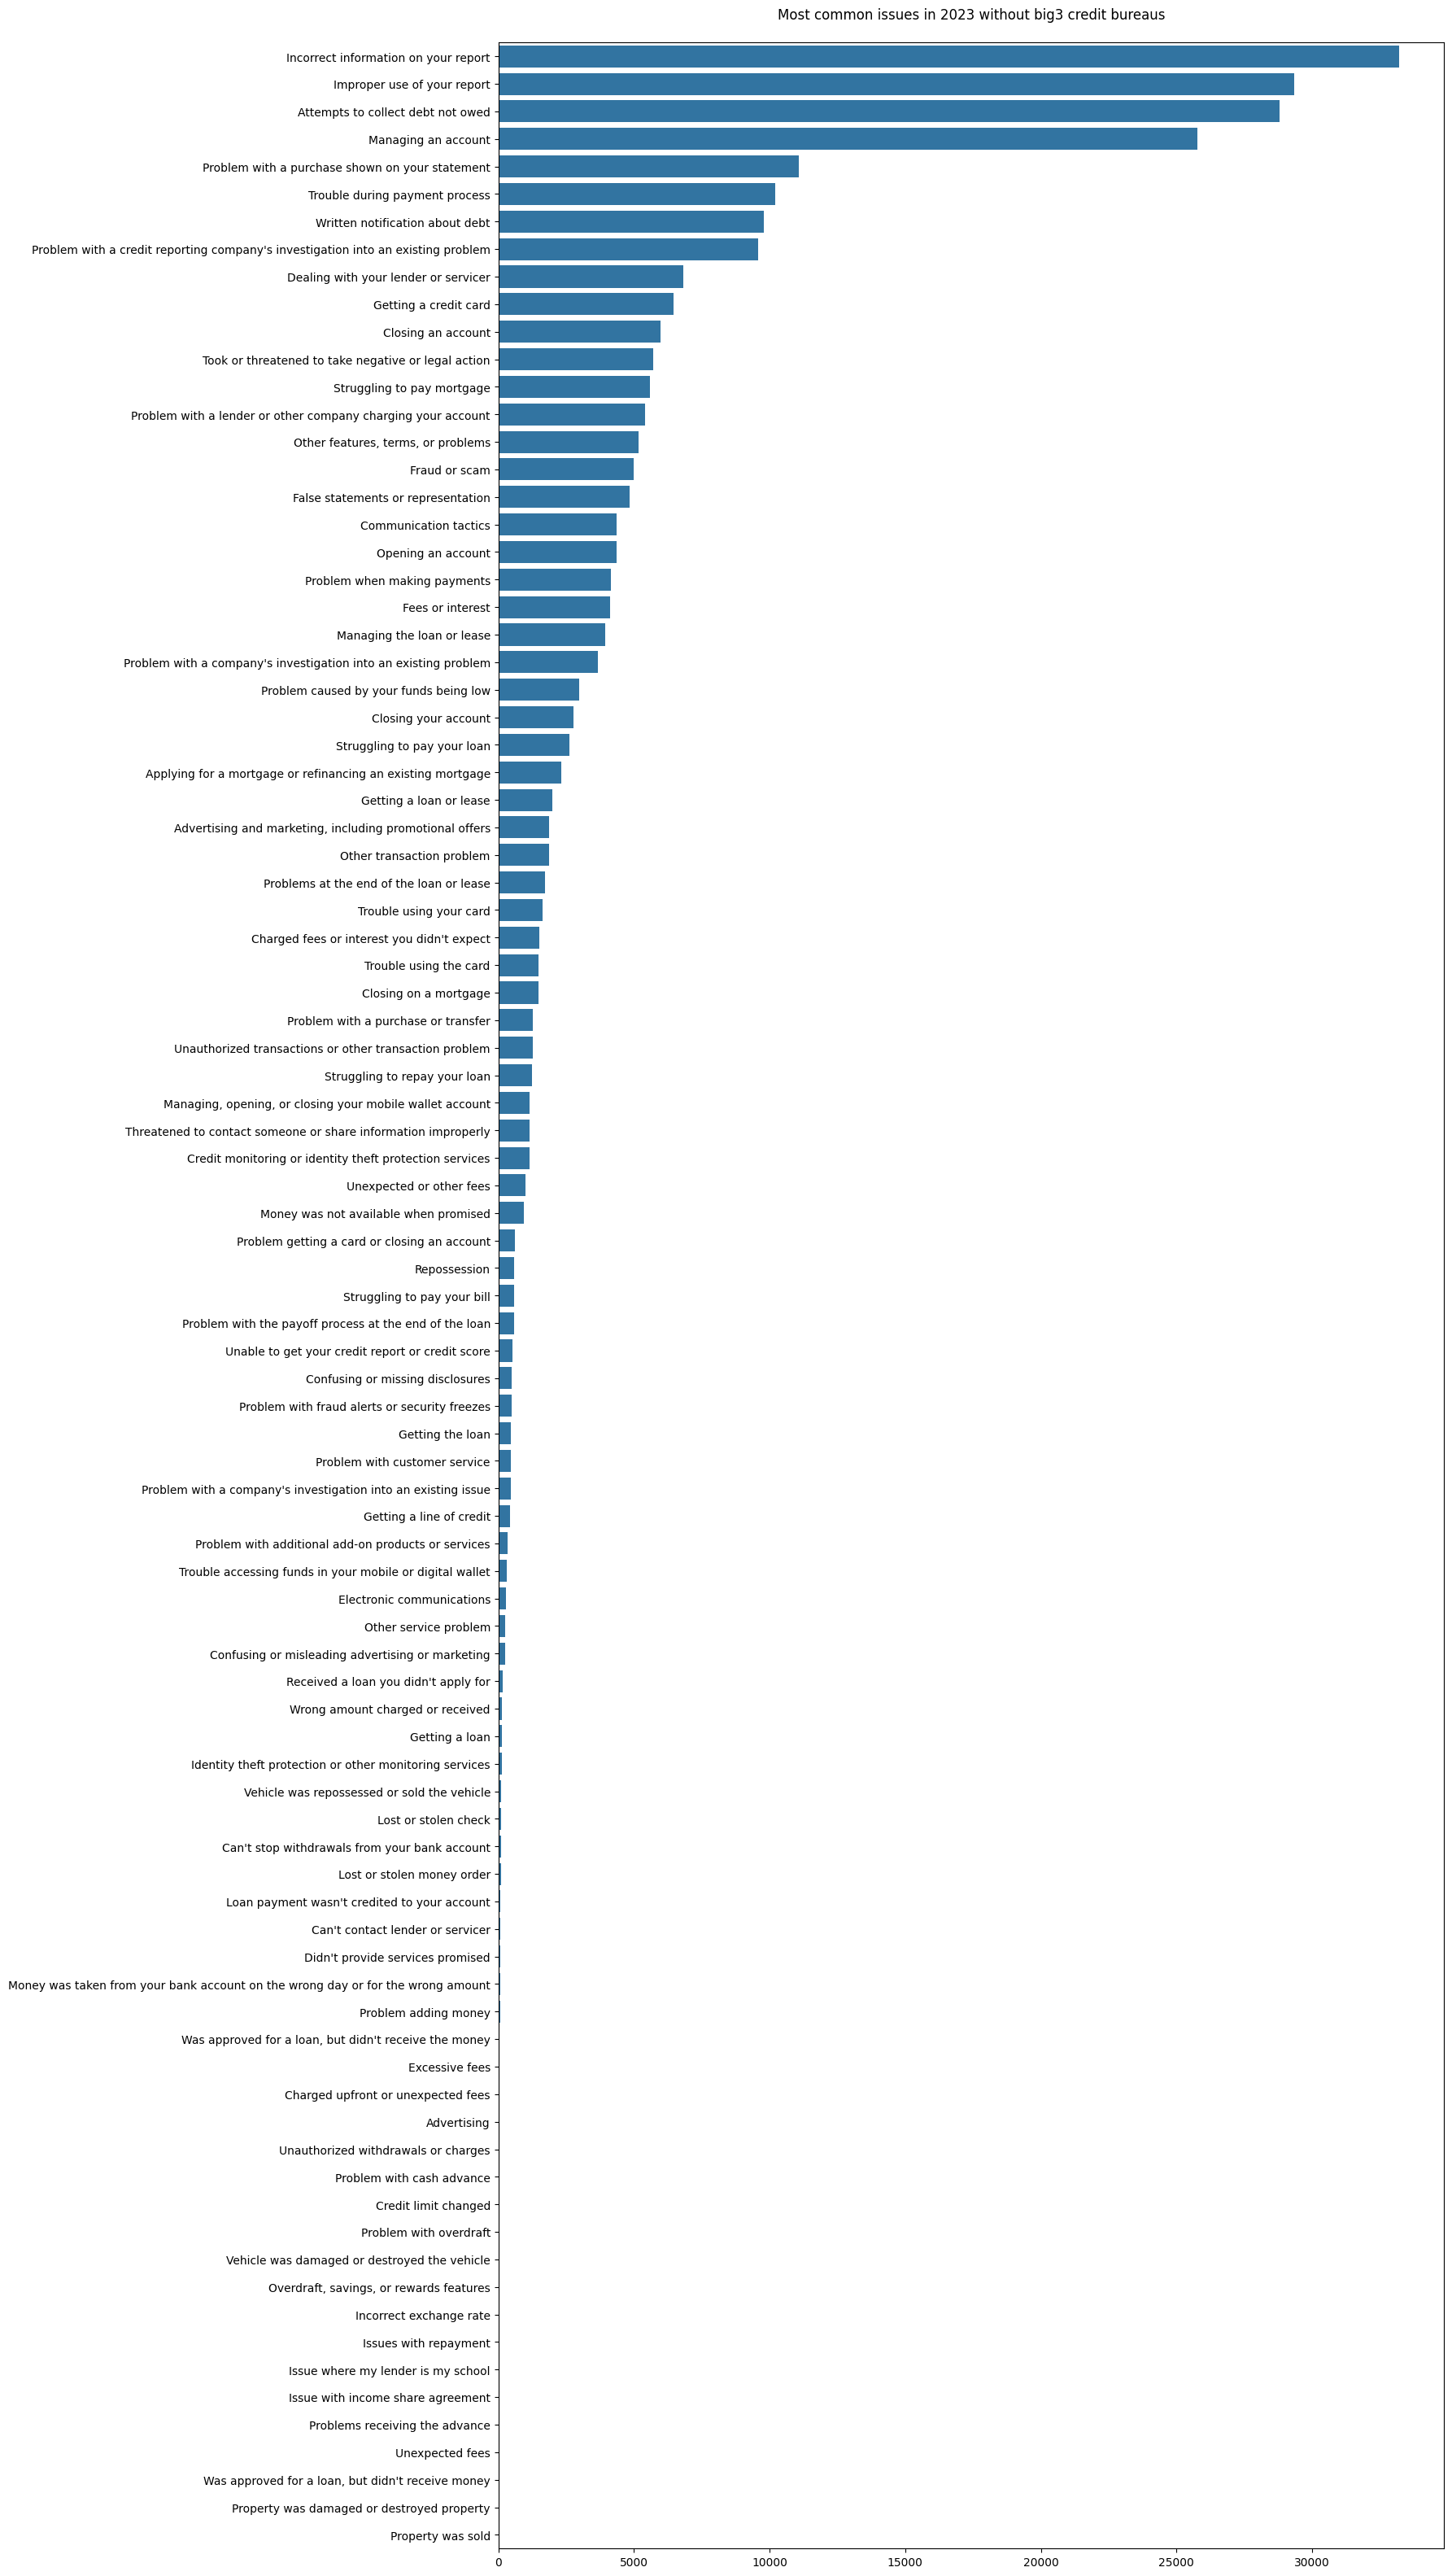

In [62]:
#2023 most common complaint issues other than big3 companies
other_companies_2023 = other_companies_year[other_companies_year['year']==2023]
plt.figure(figsize=(15,40))
sns.countplot(other_companies_2023, y='issue', order = other_companies_2023['issue'].value_counts().index)
plt.title("Most common issues in 2023 without big3 credit bureaus\n")
plt.xlabel('')
plt.ylabel('')
plt.show()

In [63]:
#Which states have highest number of complaints
complaints['state'].value_counts().nlargest(10)

state
CA    490374
FL    489913
TX    430143
GA    281171
NY    270854
PA    192983
IL    169417
NJ    143295
NC    138141
MD    111561
Name: count, dtype: int64